# Analysis of Two Machines from UNKNOT (SAGE Journals)
### Author: Keila Barbosa


---
**Journal of Low Frequency Noise, Vibration and Active Control**
---

## Exploration of Ordinal Patterns:

Deepen the exploration of Ordinal Patterns. This may involve experimenting with different symbolic representation techniques and metrics related to ordinal patterns to identify which are most appropriate for the dataset.

1. **Feature Selection** - Building on the current results, further investigate feature selection. We can explore feature selection techniques or dimensionality reduction to identify which features are most informative for distinguishing between the machines.
2. **Comparison with Traditional Approaches** - Compare the results obtained using the Ordinal Patterns approach with traditional time series analysis methods. This will help determine if the proposed techniques are superior.
3. **Support Vector Machines (SVM)** - Implement SVM to classify data into different groups using both features derived from Ordinal Patterns and traditional features. Compare classification rates and discrimination capability.
4. **Artificial Neural Networks (ANN)** - Train neural networks based on Ordinal Patterns features and traditional features. Evaluate the performance of neural networks in terms of accuracy and robustness.


# Packages

In [2]:
# Importe as bibliotecas necessárias
# from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import time
import pickle
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import joblib
import seaborn as sns
# from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import openpyxl
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix as cm  


# Traditional Characteristics

## Processing Data

In [116]:
### Local

# Substitua 'caminho/para/seu/arquivo.xlsx' pelo caminho do seu arquivo Excel
file_name = '/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Data/Two Machines Report3.xlsx'

# Leia o arquivo Excel em um DataFrame usando o pandas
OK_Machine = pd.read_excel(file_name, sheet_name='Non-Faulty Dataset.', header=None)
OK_Machine['Machine'] = 'G'  # Atribuindo o fator "G" à coluna Machine do conjunto de dados não defeituoso

Faulty_Machine = pd.read_excel(file_name, sheet_name='Faulty Dataset', header=None)
Faulty_Machine['Machine'] = 'B'  # Atribuindo o fator "B" à coluna Machine do conjunto de dados defeituoso

Measurements = pd.concat([OK_Machine, Faulty_Machine], ignore_index=True)
#Measurements.columns = ["Time", "Att1", "Att2", "Att3", "Att4", "Att5", "Att6", "Status"]
Measurements.columns = ["Att1", "Att2", "Att3", "Att4", "Att5", "Att6", "Status"]

data = Measurements
data.head()  # Isso mostrará as primeiras linhas do DataFrame carregado

,Att1,Att2,Att3,Att4,Att5,Att6,Status
0,57.1,25.7,0.044,7.841,7.843,0.0,G
1,56.5,26.0,0.036,7.877,7.877,0.0,G
2,56.0,26.4,0.037,7.751,7.751,0.0,G
3,55.4,26.6,0.036,7.820,7.820,0.0,G
4,54.9,26.7,0.040,7.713,7.713,0.0,G


In [118]:
# Separando os atributos das variáveis de destino
X = data.drop(columns=['Status'])  # Atributos
y = data['Status']  # Variável de destino

# Separando os dados por status
X_G = X[y == 'G']
X_B = X[y == 'B']
y_G = y[y == 'G']
y_B = y[y == 'B']

# Calculando o ponto de corte para cada status
cut_off_G = int(len(X_G) * 0.7)
cut_off_B = int(len(X_B) * 0.7)

# Criando os conjuntos de treinamento e teste
X_train = pd.concat([X_G[:cut_off_G], X_B[:cut_off_B]])
y_train = pd.concat([y_G[:cut_off_G], y_B[:cut_off_B]])
X_test = pd.concat([X_G[cut_off_G:], X_B[cut_off_B:]])
y_test = pd.concat([y_G[cut_off_G:], y_B[cut_off_B:]])

# Pré-processamento e normalização
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convertendo os rótulos para numéricos (por exemplo, 0 para "G" e 1 para "B")
y_train = y_train.map({'G': 0, 'B': 1})
y_test = y_test.map({'G': 0, 'B': 1})


In [119]:
from collections import Counter

# Contar quantos 0 e quantos 1 existem em y_train
count_train = Counter(y_train)
print(count_train)

# Contar quantos 0 e quantos 1 existem em y_test
count_test = Counter(y_test)
print(count_test)

Counter({0: 9050, 1: 9048})
Counter({0: 3879, 1: 3879})


## Feedforward Neural Networks for Traditional Characteristics

Feedforward Neural Networks Architecture

### Model

Epoch 1/10
1132/1132 [==============================] - 1s 647us/step - loss: 0.5589 - accuracy: 0.7088 - val_loss: 0.4523 - val_accuracy: 0.8034
Epoch 2/10
1132/1132 [==============================] - 1s 581us/step - loss: 0.3579 - accuracy: 0.8464 - val_loss: 0.4001 - val_accuracy: 0.7970
Epoch 3/10
1132/1132 [==============================] - 1s 615us/step - loss: 0.3123 - accuracy: 0.8571 - val_loss: 0.4415 - val_accuracy: 0.7867
Epoch 4/10
1132/1132 [==============================] - 1s 578us/step - loss: 0.2993 - accuracy: 0.8590 - val_loss: 0.4118 - val_accuracy: 0.7957
Epoch 5/10
1132/1132 [==============================] - 1s 567us/step - loss: 0.2919 - accuracy: 0.8618 - val_loss: 0.4405 - val_accuracy: 0.8015
Melhor Precisão na Época: 1 com Acurácia: 0.8034
Tempo de Treinamento (segundos): 3.76


Epoch 1/20
566/566 [==============================] - 1s 706us/step - loss: 0.4065 - accuracy: 0.7972 - val_loss: 0.4199 - val_accuracy: 0.7867
Epoch 2/20
566/566 [==============================] - 0s 611us/step - loss: 0.3067 - accuracy: 0.8503 - val_loss: 0.4470 - val_accuracy: 0.7944
Epoch 3/20
566/566 [==============================] - 0s 674us/step - loss: 0.2983 - accuracy: 0.8539 - val_loss: 0.3922 - val_accuracy: 0.7868
Epoch 4/20
566/566 [==============================] - 0s 603us/step - loss: 0.2899 - accuracy: 0.8572 - val_loss: 0.4878 - val_accuracy: 0.7990
Epoch 5/20
566/566 [==============================] - 0s 605us/step - loss: 0.2877 - accuracy: 0.8566 - val_loss: 0.5239 - val_accuracy: 0.7948
Epoch 6/20
566/566 [==============================] - 0s 613us/step - loss: 0.2757 - accuracy: 0.8641 - val_loss: 0.3602 - val_accuracy: 0.8198
Epoch 7/20
566/566 [==============================] - 0s 619us/step - loss: 0.2758 - accuracy: 0.8656 - val_loss: 0.5700 - val_accuracy:

Melhor Precisão na Época: 6 com Acurácia: 0.8198
Tempo de Treinamento (segundos): 8.01
Epoch 1/30
283/283 [==============================] - 1s 947us/step - loss: 0.4577 - accuracy: 0.7645 - val_loss: 0.4814 - val_accuracy: 0.7868
Epoch 2/30
283/283 [==============================] - 0s 702us/step - loss: 0.3431 - accuracy: 0.8319 - val_loss: 0.3635 - val_accuracy: 0.8110
Epoch 3/30
283/283 [==============================] - 0s 713us/step - loss: 0.3206 - accuracy: 0.8474 - val_loss: 0.6800 - val_accuracy: 0.7974
Epoch 4/30
283/283 [==============================] - 0s 704us/step - loss: 0.3134 - accuracy: 0.8466 - val_loss: 0.7654 - val_accuracy: 0.7958
Epoch 5/30
283/283 [==============================] - 0s 704us/step - loss: 0.3185 - accuracy: 0.8471 - val_loss: 0.3768 - val_accuracy: 0.7920
Epoch 6/30
283/283 [==============================] - 0s 699us/step - loss: 0.3053 - accuracy: 0.8510 - val_loss: 0.3925 - val_accuracy: 0.8010
Epoch 7/30
283/283 [=============================

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


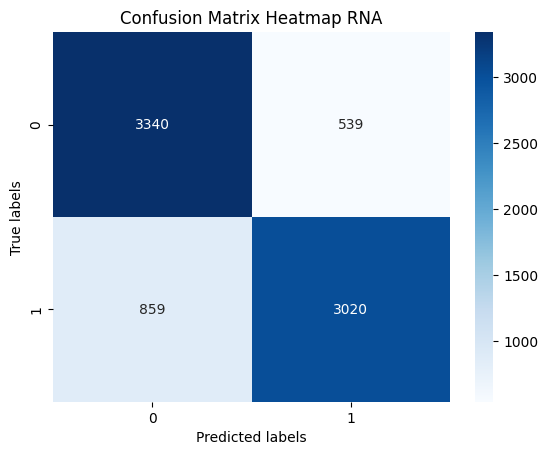

<Figure size 640x480 with 0 Axes>

In [175]:

# Função para criar, compilar e treinar o modelo
def train_model(params):
    model = keras.Sequential([
        keras.layers.Dense(params['units1'], activation='relu', input_shape=(X_train_normalized.shape[1],)),
        keras.layers.Dense(params['units2'], activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    early_stopping = tf.keras.callbacks.EarlyStopping(patience=params['patience'], restore_best_weights=True)

    history = model.fit(
        X_train_normalized, y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(X_test_normalized, y_test),
        callbacks=[early_stopping],
        verbose=1
    )

    return model, history

# Parâmetros a serem otimizados
param_grid = [
    {'units1': 32, 'units2': 16, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 16, 'patience': 3},
    {'units1': 64, 'units2': 32, 'learning_rate': 0.01, 'epochs': 20, 'batch_size': 32, 'patience': 5},
    {'units1': 128, 'units2': 64, 'learning_rate': 0.1, 'epochs': 30, 'batch_size': 64, 'patience': 7}
]

# Inicialização das variáveis
best_accuracy = 0
best_model = None
best_params = None  # Melhores parâmetros
best_epoch = None  # Melhor época

# Caminhos de salvamento do modelo e do otimizador
model_save_path = "melhor_modelo_checkpoint_RNA_Trad.h5"
optimizer_save_path = "melhor_optimizer_checkpoint_RNA_Trad.pkl"

# Inicie o cronômetro
start_time = time.time()

# Loop para treinamento
for params in param_grid:
    model, history = train_model(params)
    val_accuracy = max(history.history['val_accuracy'])
    current_best_epoch = history.history['val_accuracy'].index(val_accuracy) + 1
    print(f"Melhor Precisão na Época: {current_best_epoch} com Acurácia: {val_accuracy:.4f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model
        best_params = params
        best_epoch = current_best_epoch

    # Pare o cronômetro
    end_time = time.time()
    training_time = end_time - start_time

    # Exibindo o tempo de treinamento
    print(f"Tempo de Treinamento (segundos): {training_time:.2f}")

if best_model:
    # Avalie o modelo nos dados de teste
    test_loss, test_accuracy = best_model.evaluate(X_test_normalized, y_test, verbose=0)
    y_pred = best_model.predict(X_test_normalized)
    y_pred = (y_pred > 0.5).astype(int)  # Converta probabilidades para rótulos de classe 0 ou 1

    # Calcula métricas adicionais
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    best_f1_score = f1_score(y_test, y_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    # Imprime as métricas de desempenho
    print(f"Acurácia nos Dados de Teste: {test_accuracy:.4f}")
    print(f"Recall nos Dados de Teste: {recall:.4f}")
    print(f"Precision nos Dados de Teste: {precision:.4f}")
    print(f"F1-Score nos Dados de Teste: {best_f1_score:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(confusion_matrix_result)

    # Salve o melhor modelo treinado (incluindo otimizador)
    best_model.save(model_save_path)
    print("Melhor modelo salvo.")

    # Mostrar os melhores parâmetros
    print("Melhores Parâmetros:")
    print(best_params)

    # Crie um heatmap para a matriz de confusão
    sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix Heatmap RNA')
    plt.show()
    plt.savefig('confusionMatrix_RNATrad.pdf')  # Salva a figura no formato PDF

else:
    print("O treinamento não foi bem-sucedido.")

In [176]:
# Atualize o dicionário com todas as variáveis necessárias
variables_to_save_RNATrad = {
    'best_accuracy': best_accuracy,
    'best_model': best_model,  
    'best_params': best_params,
    'best_epoch': best_epoch,
    'training_time': training_time,
    'test_accuracy': test_accuracy,  
    'best_f1_score': best_f1_score,  
    'confusion_matrix_result': confusion_matrix_result  
}

# Salve as variáveis em um arquivo pickle
with open('/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/variables_to_save_FFN_Trad.pkl', 'wb') as f:
    pickle.dump(variables_to_save_RNATrad, f)
print("Variáveis salvas com sucesso.")


# # Carregue as variáveis do arquivo pickle
# with open('variables_to_save_FFN_Trad.pkl', 'rb') as f:
#     loaded_variables = pickle.load(f)

# # Agora você pode acessar as variáveis carregadas:
# best_accuracy = loaded_variables['best_accuracy']
# best_model = loaded_variables['best_model']
# best_params = loaded_variables['best_params']
# best_time = loaded_variables['best_time']
# confusion_matrix_result: loaded_variables[confusion_matrix_result]
# print("Variáveis carregadas com sucesso.")

Variáveis salvas com sucesso.


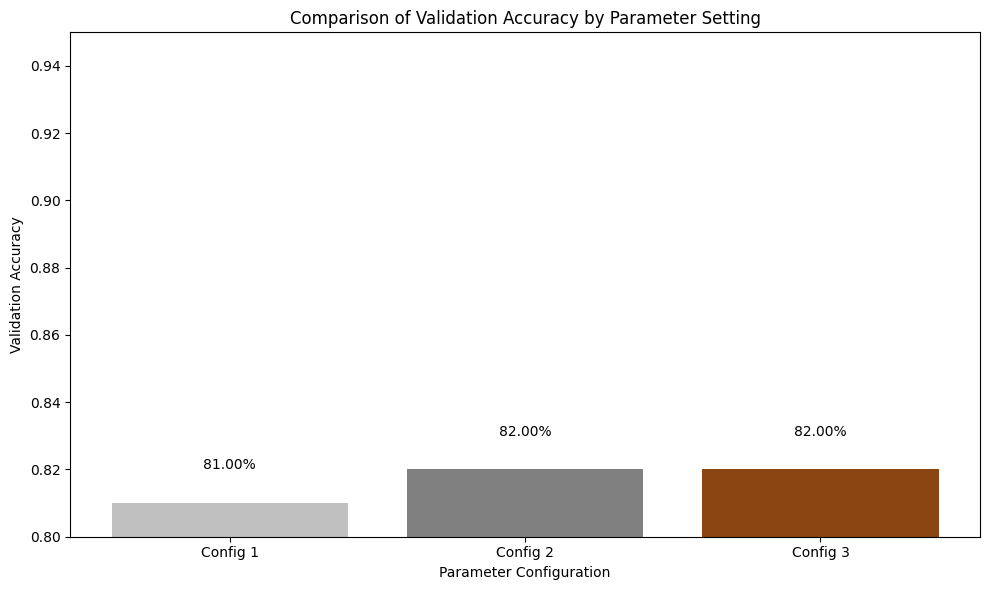

<Figure size 640x480 with 0 Axes>

In [124]:

val_accuracies = [
    0.81,  # Primeira configuração de parâmetro
    0.82,  # Segunda configuração de parâmetro
    0.82   # Terceira configuração de parâmetro
]

# Nomes das configurações dos parâmetros
param_names = ['Config 1', 'Config 2', 'Config 3']

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(param_names, val_accuracies, color=['Silver', 'gray', 'SaddleBrown'])

# Adicionando títulos e rótulos
plt.title('Comparison of Validation Accuracy by Parameter Setting')
plt.xlabel('Parameter Configuration')
plt.ylabel('Validation Accuracy')
plt.ylim([0.8, 0.95])  # Definindo o limite do eixo y para melhor visualização

# Adicionando a precisão de validação em cima das barras
for i, accuracy in enumerate(val_accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2%}", ha='center')

# Mostrar o gráfico
plt.tight_layout()
plt.show()
plt.savefig('Parameter Setting_RNAOrdTrad.pdf')  # Salva a figura no formato PDF

/var/folders/3v/5dxc2ttn41zg55b7dvw5v9q40000gn/T/ipykernel_45166/3253610034.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['{:.0f}%'.format(y * 100) if y * 100 % 1 == 0 else '{:.2f}%'.format(y * 100) for y in ax1.get_yticks()])


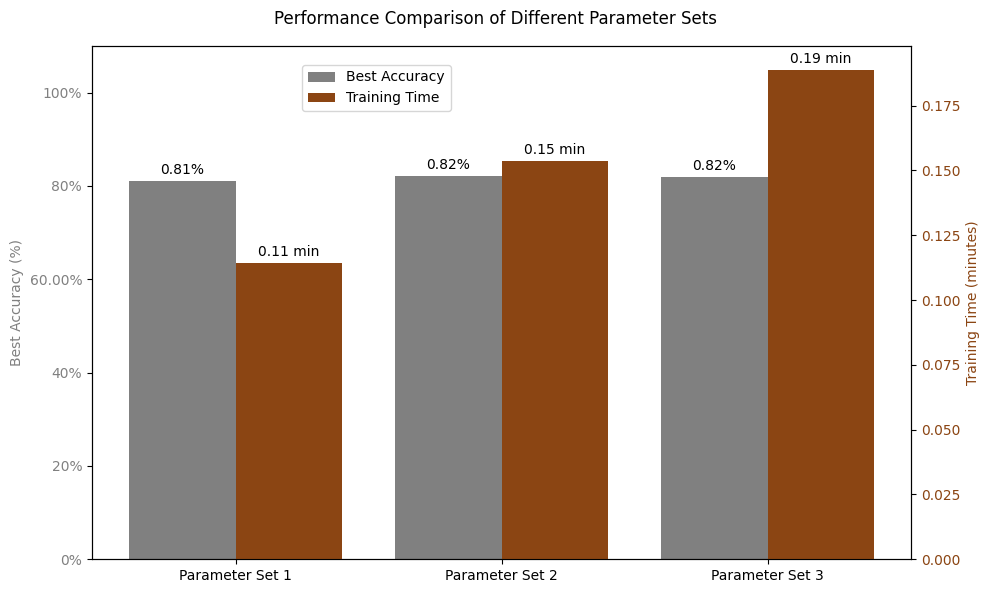

<Figure size 640x480 with 0 Axes>

In [125]:
# Dados de precisão de validação e tempo de treinamento para cada configuração de parâmetros
accuracy_data = {
    'Parameter Set 1': {'Best Epoch': 7, 'Best Accuracy': 0.8099, 'Training Time': 6.862},
    'Parameter Set 2': {'Best Epoch': 1, 'Best Accuracy': 0.8212, 'Training Time': 9.226},
    'Parameter Set 3': {'Best Epoch': 2, 'Best Accuracy': 0.8184, 'Training Time': 11.316}
}


# Configurações de parâmetros
param_configs = list(accuracy_data.keys())

# Precisões de validação e tempos de treinamento
accuracies = [d['Best Accuracy'] for d in accuracy_data.values()]
training_times = [d['Training Time'] for d in accuracy_data.values()]

# Converter tempo de treinamento de segundos para minutos
training_times_minutes = [t / 60 for t in training_times]

# Criar figuras e eixos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras de precisão de validação
bar1 = ax1.bar(np.arange(len(accuracies)), accuracies, width=0.4, label='Best Accuracy', color='gray')
ax1.set_ylabel('Best Accuracy (%)', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')
ax1.set_ylim(0, 1.1)  # Ajustar o limite do eixo y para a precisão
# Converter precisão para porcentagem
ax1.set_yticklabels(['{:.0f}%'.format(y * 100) if y * 100 % 1 == 0 else '{:.2f}%'.format(y * 100) for y in ax1.get_yticks()])

# Adicionar anotações de precisão em cima das barras
for bar in bar1:
    height = bar.get_height()
    ax1.annotate(f'{height:.0f}%' if height % 1 == 0 else f'{height:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 pontos de deslocamento vertical
                 textcoords='offset points',
                 ha='center', va='bottom')

# Eixo secundário para o tempo de treinamento
ax2 = ax1.twinx()
bar2 = ax2.bar(np.arange(len(training_times_minutes)) + 0.4, training_times_minutes, width=0.4, label='Training Time', color='SaddleBrown')
ax2.set_ylabel('Training Time (minutes)', color='SaddleBrown')
ax2.tick_params(axis='y', labelcolor='SaddleBrown')

# Adicionar anotações de tempo em cima das barras
for bar in bar2:
    height = bar.get_height()
    ax2.annotate(f'{height:.2f} min',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 pontos de deslocamento vertical
                 textcoords='offset points',
                 ha='center', va='bottom')

# Definir rótulos do eixo x
ax1.set_xticks(np.arange(len(accuracies)) + 0.2)
ax1.set_xticklabels(param_configs)

# Título e legenda
fig.suptitle('Performance Comparison of Different Parameter Sets')
fig.legend(loc='upper left', bbox_to_anchor=(0.3, 0.9))

# Mostrar o gráfico
plt.tight_layout()
plt.show()

plt.savefig('Performance Setting_RNATrad.pdf')  # Salva a figura no formato PDF

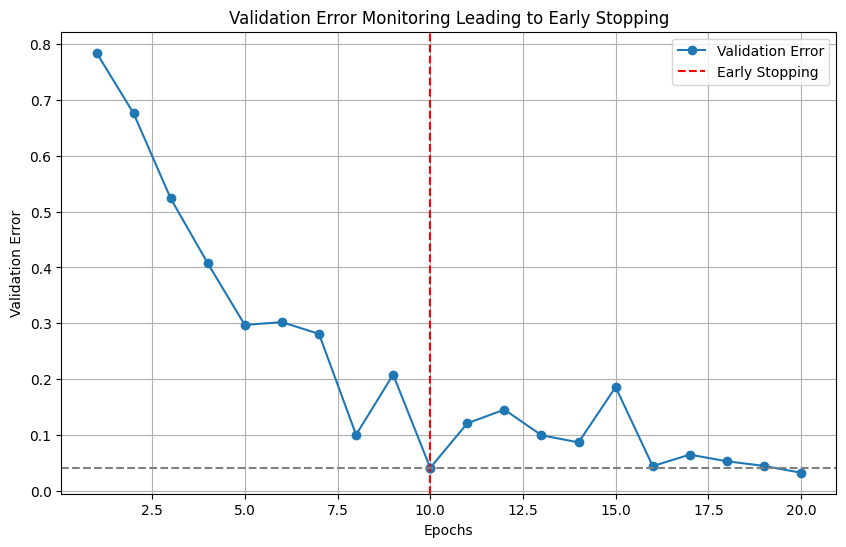

In [139]:
# Early Stopping

# Sample data to represent validation error over epochs
epochs = np.arange(1, 21)
validation_error = np.exp(-epochs/5.0) + 0.05 * np.random.randn(20)  # Decreasing error
validation_error[10:] += np.arange(0, 0.1, 0.01)  # Error starts increasing after 10th epoch

# Early stopping point
early_stopping_epoch = 10
early_stopping_error = validation_error[early_stopping_epoch - 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_error, label='Validation Error', marker='o')
plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early Stopping')
plt.axhline(y=early_stopping_error, color='grey', linestyle='--')
plt.scatter(early_stopping_epoch, early_stopping_error, color='red')

# Annotations and labels
plt.title('Validation Error Monitoring Leading to Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Validation Error')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('validation_error_with_early_stopping.pdf')
plt.show()


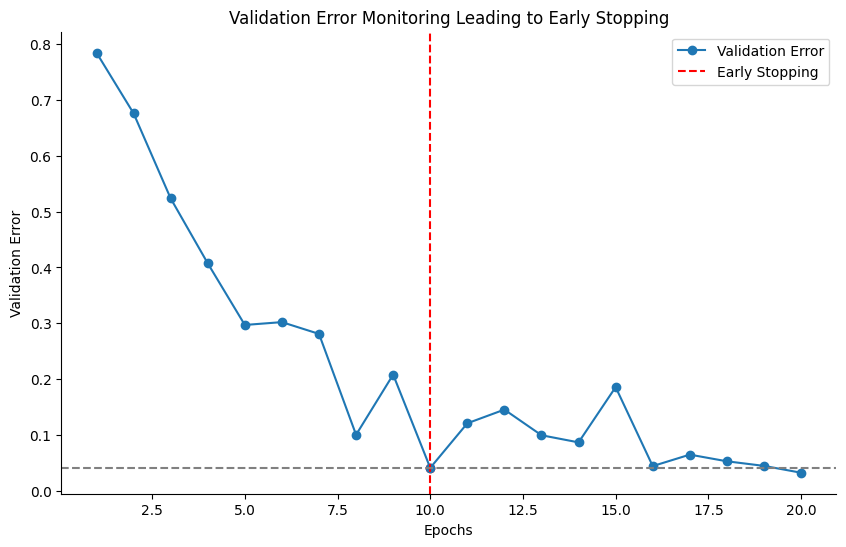

In [160]:
# Early Stopping

plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_error, label='Validation Error', marker='o')
plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early Stopping')
plt.axhline(y=early_stopping_error, color='grey', linestyle='--')
plt.scatter(early_stopping_epoch, early_stopping_error, color='red')

# Annotations and labels
plt.title('Validation Error Monitoring Leading to Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Validation Error')
plt.legend()

# Remove the grid
plt.grid(False)

# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the figure
plt.savefig('validation_error_with_early_stopping2.pdf')
plt.show()

## Support Vector Machines (SVM) for Traditional Characteristics

Implement SVM to classify data into different groups, using both features derived from Ordinal Patterns and traditional features. Compare classification rates and discrimination ability.


### Model

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.767 total time=   4.5s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.738 total time=   4.3s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.859 total time=   4.4s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.807 total time=   4.4s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.789 total time=   4.2s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.529 total time=   5.8s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.523 total time=   5.9s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.605 total time=   5.9s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.569 total time=   5.9s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.599 total time=   6.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.678 total time=   5.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

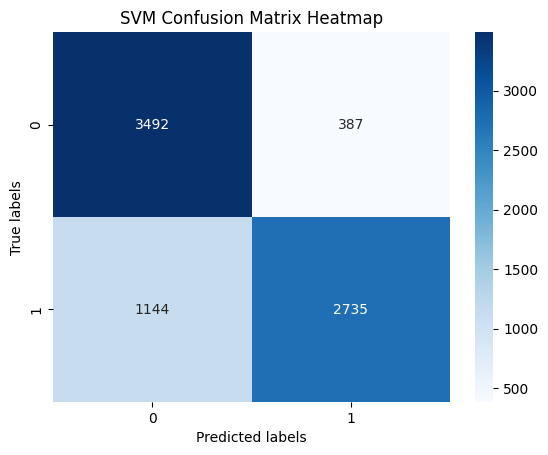

<Figure size 640x480 with 0 Axes>

In [161]:

# Definição do grid de hiperparâmetros para GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Inicialização do GridSearchCV com o modelo SVM
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinamento do modelo SVM com GridSearchCV para encontrar os melhores hiperparâmetros
start_time = time.time()
svm_grid_search.fit(X_train_normalized, y_train)
training_time = time.time() - start_time

# Avaliação do melhor modelo SVM encontrado pelo GridSearchCV
best_svm_model = svm_grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_normalized)

# Calcula as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe os resultados
print('Best Parameters:', svm_grid_search.best_params_)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Training Time: {training_time:.2f} seconds')

# Salva o melhor modelo SVM
model_save_path = "best_svm_model.pkl"
joblib.dump(best_svm_model, model_save_path)
print("Best SVM model saved.")

# Cria e exibe o heatmap da matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix Heatmap')
plt.show()
plt.savefig('svm_confusion_matrix_heatmap.pdf')


In [167]:
# Avaliação do melhor modelo SVM encontrado pelo GridSearchCV
best_svm_model = svm_grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_normalized)

# Calcula as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
training_time_svm = training_time  # assumindo que best_time é o tempo de treinamento do SVM

# Exibe os resultados
print('Best Parameters:', svm_grid_search.best_params_)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f"Training Time SVM: {training_time_svm:.2f} seconds")

# Salvando as variáveis para uso posterior
variables_to_save_svmTrad = {
    'best_accuracy': accuracy,  # Atualiza com a acurácia do melhor modelo
    'best_model': best_svm_model,  # Atualiza com o melhor modelo encontrado
    'best_params': svm_grid_search.best_params_,  # Atualiza com os melhores parâmetros encontrados
    'best_time': training_time_svm,  # Atualiza com o tempo de treinamento do melhor modelo
    'confusion_matrix_result': conf_matrix,  # Atualiza com a matriz de confusão do melhor modelo
    'recall': recall,  # Atualiza com o recall
    'precision': precision,  # Atualiza com a precisão
    'f1_score': f1,  # Atualiza com o f1-score
    # Inclua outras variáveis aqui conforme necessário
}

# Salve as variáveis em um arquivo pickle
with open('variables_to_save_svmTrad.pkl', 'wb') as f:
    pickle.dump(variables_to_save_svmTrad, f)
print("Variáveis salvas com sucesso.")

# # Carregue as variáveis do arquivo pickle para utilização futura
# with open('variables_to_save_svmTrad.pkl', 'rb') as f:
#     loaded_variables = pickle.load(f)
# # Agora você pode acessar as variáveis carregadas, por exemplo:
# best_accuracy = loaded_variables['best_accuracy']
# best_model = loaded_variables['best_model']
# best_params = loaded_variables['best_params']
# best_time = loaded_variables['best_time']
# confusion_matrix_result = loaded_variables['confusion_matrix_result']
# recall = loaded_variables['recall']
# precision = loaded_variables['precision']
# f1_score = loaded_variables['f1_score']
# print("Variáveis carregadas com sucesso.")

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Confusion Matrix:
 [[3492  387]
 [1144 2735]]
Accuracy: 0.8027
Recall: 0.7051
Precision: 0.8760
F1-Score: 0.7813
Training Time SVM: 4.83 seconds
Variáveis salvas com sucesso.


## Network Encoder for Traditional Characteristics winth SVM


### Model

In [130]:
# Inicialização da melhor perda de validação e modelo
best_loss = float('inf')
best_autoencoder_model = None
best_params = {}

# Defina o grid de hiperparâmetros para o Autoencoder
autoencoder_params_grid = {
    'encoding_dim': [8, 16, 32],
    'activation': ['relu', 'tanh']
}

# Loop para iterar sobre o grid de hiperparâmetros
for encoding_dim in autoencoder_params_grid['encoding_dim']:
    for activation in autoencoder_params_grid['activation']:
        # Construa o modelo para cada combinação de hiperparâmetros
        autoencoder_model = Sequential([
            Dense(encoding_dim, activation=activation, input_shape=(X_train_normalized.shape[1],)),
            Dense(X_train_normalized.shape[1], activation='linear')
        ])

        # Compile o modelo
        autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

        # Treine o modelo
        start_time = time.time()
        history_autoencoder = autoencoder_model.fit(
            X_train_normalized, X_train_normalized,
            epochs=100,
            batch_size=32,
            validation_split=0.2,
            callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
        )
        training_time_autoencoder = time.time() - start_time

        # Avalie o modelo usando a perda de validação
        val_loss = history_autoencoder.history['val_loss'][-1]  # Última perda de validação

        # Compare a perda de validação com a melhor perda
        if val_loss < best_loss:
            best_loss = val_loss
            best_autoencoder_model = autoencoder_model
            best_params = {'encoding_dim': encoding_dim, 'activation': activation}
            # Salve o modelo como o melhor se necessário
            best_autoencoder_model.save('best_autoencoder_model_Trad.h5')

# Imprima a melhor perda de validação e os melhores hiperparâmetros
print(f"Melhor perda de validação: {best_loss}")
print(f"Melhores parâmetros: {best_params}")


Epoch 1/100


453/453 [==============================] - 0s 586us/step - loss: 0.7301 - val_loss: 0.3402
Epoch 2/100
453/453 [==============================] - 0s 496us/step - loss: 0.1779 - val_loss: 0.1112
Epoch 3/100
453/453 [==============================] - 0s 458us/step - loss: 0.0599 - val_loss: 0.0423
Epoch 4/100
453/453 [==============================] - 0s 450us/step - loss: 0.0267 - val_loss: 0.0256
Epoch 5/100
453/453 [==============================] - 0s 542us/step - loss: 0.0153 - val_loss: 0.0198
Epoch 6/100
453/453 [==============================] - 0s 450us/step - loss: 0.0104 - val_loss: 0.0158
Epoch 7/100
453/453 [==============================] - 0s 447us/step - loss: 0.0076 - val_loss: 0.0136
Epoch 8/100
453/453 [==============================] - 0s 475us/step - loss: 0.0058 - val_loss: 0.0117
Epoch 9/100
453/453 [==============================] - 0s 448us/step - loss: 0.0044 - val_loss: 0.0105
Epoch 10/100
453/453 [==============================] - 0s 448us/step - loss: 0.0036 

243/243 [==============================] - 0s 285us/step
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.766 total time=   4.4s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.737 total time=   4.4s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.859 total time=   4.5s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.807 total time=   4.5s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.789 total time=   4.3s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.529 total time=   5.9s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.524 total time=   6.4s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.606 total time=   6.1s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.569 total time=   6.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.599 total time=   6.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.678 total tim

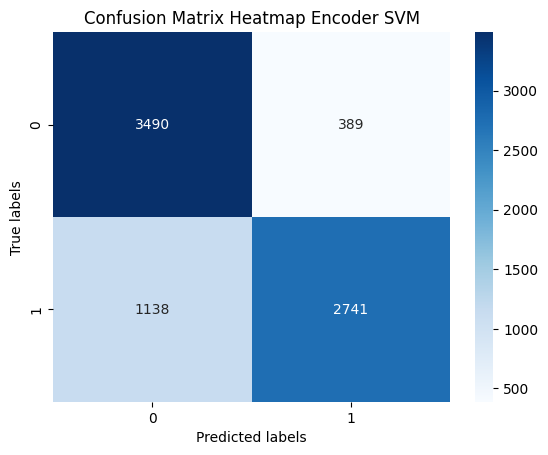

<Figure size 640x480 with 0 Axes>

In [137]:

# # Carregar o melhor modelo de Autoencoder salvo anteriormente
# best_autoencoder_model = load_model('best_autoencoder_model.h5')

# Caminhos de salvamento do modelo e do otimizador
model_save_path = "best_autoencoderSVM_model_Trad" 
optimizer_save_path = "best_autoencoderSVM_model_Trad.pkl"

# Usando o melhor modelo de Autoencoder para codificar os dados
encoded_data_train = best_autoencoder_model.predict(X_train_normalized)
encoded_data_test = best_autoencoder_model.predict(X_test_normalized)

# Configuração do GridSearchCV para SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Lista de valores de C para testar
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],  # Lista de valores de gamma para testar
    'kernel': ['rbf']  # Tipo de kernel a ser usado no SVM
}

# Inicialização do GridSearchCV com o modelo SVM
svm_grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinamento do modelo SVM com GridSearchCV para encontrar os melhores hiperparâmetros
start_time = time.time()
svm_grid_search.fit(encoded_data_train, y_train)
training_time_svm = time.time() - start_time

# Avaliação do melhor modelo SVM encontrado pelo GridSearchCV
best_svm_model = svm_grid_search.best_estimator_
y_pred = best_svm_model.predict(encoded_data_test)

# Calcula as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcula a matriz de confusão e depois cria o heatmap
conf_matrix = cm(y_test, y_pred)  

print('Best Parameters:', svm_grid_search.best_params_)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f"Training Time SVM: {training_time_svm:.2f} seconds")

# Save the best SVM model
joblib.dump(best_svm_model, optimizer_save_path)

# Agora, crie um gráfico de calor para a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap Encoder SVM')
plt.show()
plt.savefig('confusionMatrix_EncoderSVM_Trad.pdf')  # Save the figure in PDF format

In [138]:
# Salvar variáveis relevantes para uso posterior
variables_to_save_EncoderSVMTrad = {
    'best_loss': best_loss,
    'best_autoencoder_model': best_autoencoder_model,  
    'best_svm_model': best_svm_model,  
    'best_params_autoencoder': best_params,  
    'best_params_svm': svm_grid_search.best_params_, 
    'accuracy': accuracy,
    'recall': recall,
    'precision': precision,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'training_time_autoencoder': training_time_autoencoder,
    'training_time_svm': training_time_svm
}

# Salvar as variáveis em um arquivo pickle
variables_save_path = '/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/variables_to_save_EncoderSVMTrad.pkl'
with open(variables_save_path, 'wb') as f:
    pickle.dump(variables_to_save_EncoderSVMTrad, f)
print("Variáveis salvas com sucesso.")


# # Carregue as variáveis do arquivo pickle
# with open('/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/variables_to_save_EncoderSVMTrad.pkl', 'rb') as f:
#     loaded_variables = pickle.load(f)

# # Agora você pode acessar as variáveis carregadas, por exemplo:
# best_loss = loaded_variables['best_loss']
# best_autoencoder_model = loaded_variables['best_autoencoder_model']  
# best_svm_model = loaded_variables['best_svm_model']  
# best_params_autoencoder = loaded_variables['best_params_autoencoder']
# best_params_svm = loaded_variables['best_params_svm']
# accuracy = loaded_variables['accuracy']
# recall = loaded_variables['recall']
# precision = loaded_variables['precision']
# f1_score = loaded_variables['f1_score']
# confusion_matrix = loaded_variables['confusion_matrix']
# training_time_autoencoder = loaded_variables['training_time_autoencoder']
# training_time_svm = loaded_variables['training_time_svm']

# print("Variáveis carregadas com sucesso.")


Variáveis salvas com sucesso.


## Decision Tree for Traditional Characteristics

### Model

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.954 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.977 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.946 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.968 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.970 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.956 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.976 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.949 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.967 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples

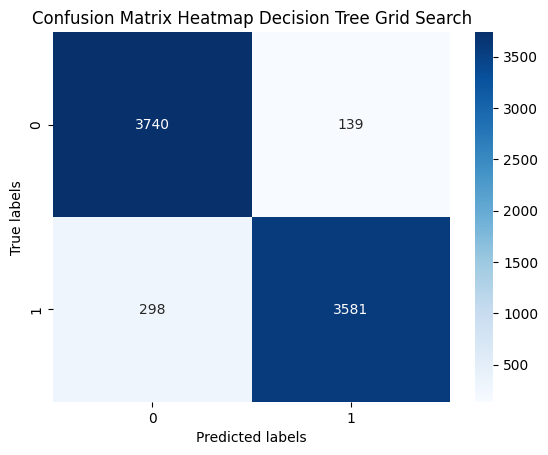

<Figure size 640x480 with 0 Axes>

In [172]:

# Configuração do GridSearchCV para Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}

# Inicialização do GridSearchCV com o modelo de árvore de decisão
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinamento do modelo de árvore de decisão com GridSearchCV para encontrar os melhores hiperparâmetros
start_time = time.time()
decision_tree_grid_search.fit(X_train_normalized, y_train)
training_time = time.time() - start_time

# Avaliação do melhor modelo de árvore de decisão encontrado pelo GridSearchCV
best_decision_tree_model = decision_tree_grid_search.best_estimator_
y_pred = best_decision_tree_model.predict(X_test_normalized)

# Calcula as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calcula a matriz de confusão e depois cria o heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe as melhores configurações e métricas
print('Best Parameters:', decision_tree_grid_search.best_params_)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f"Training Time Decision Tree: {training_time:.2f} seconds")

# Salve o melhor modelo de árvore de decisão
model_save_path = "best_model_Decision_Tree_Trad.pkl"
joblib.dump(best_decision_tree_model, model_save_path)

# Crie um gráfico de calor para a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap Decision Tree Grid Search')
plt.show()
plt.savefig('confusionMatrix_model_Decision_Tree_Trad.pdf')  # Salva a figura no formato PDF


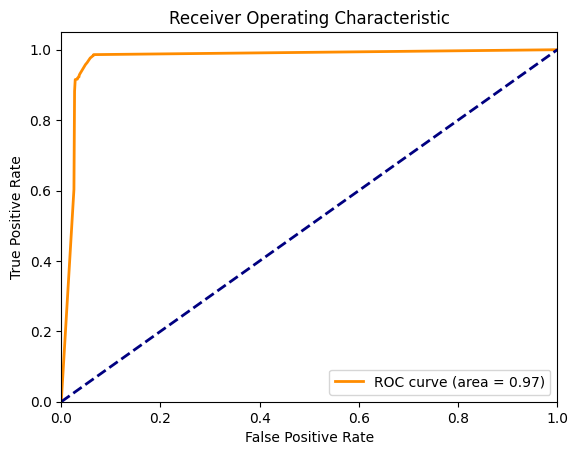

In [173]:

# `y_test` são os rótulos verdadeiros e `decision_tree_model` é o modelo já treinado
y_probs = best_decision_tree_model.predict_proba(X_test_normalized)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curve_Tradicional_DecisionT.pdf')  # Salva a figura no formato PDF
# plt.close()

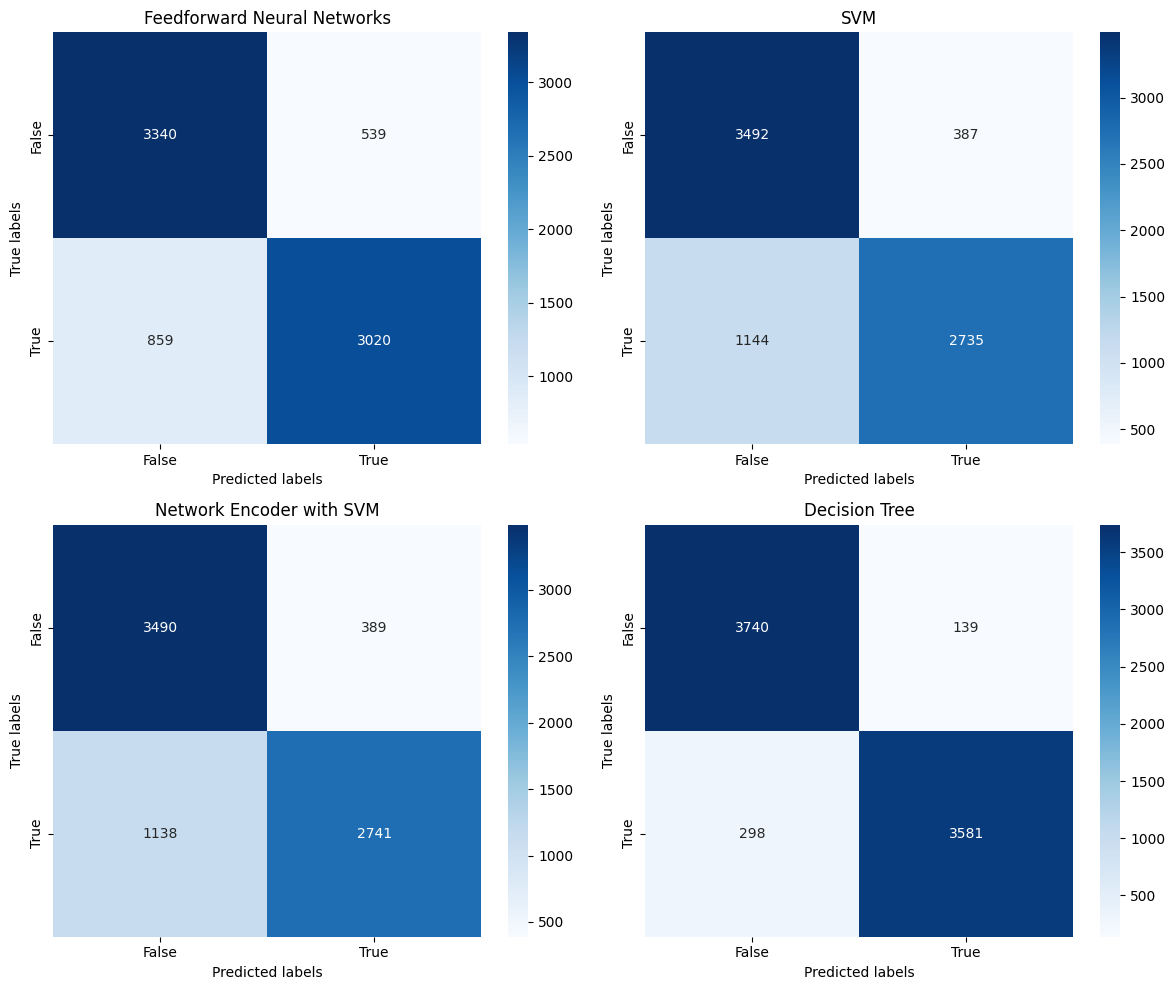

In [184]:

# Confusion matrix values for each model
confusion_matrices = {
    'Feedforward Neural Networks': [[3340, 539], [859, 3020]],
    'SVM': [[3492, 387], [1144, 2735]],
    'Network Encoder with SVM': [[3490, 389], [1138, 2741]],
    'Decision Tree': [[3740, 139], [298, 3581]]
}

# Adjusting the heatmap color to a sky blue color palette
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (model, matrix) in zip(axes, confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['False', 'True'])
    ax.yaxis.set_ticklabels(['False', 'True'])

plt.tight_layout()
plt.savefig('MatrixC_ScenarioI.pdf')  # Salva a figura no formato PDF
plt.show()



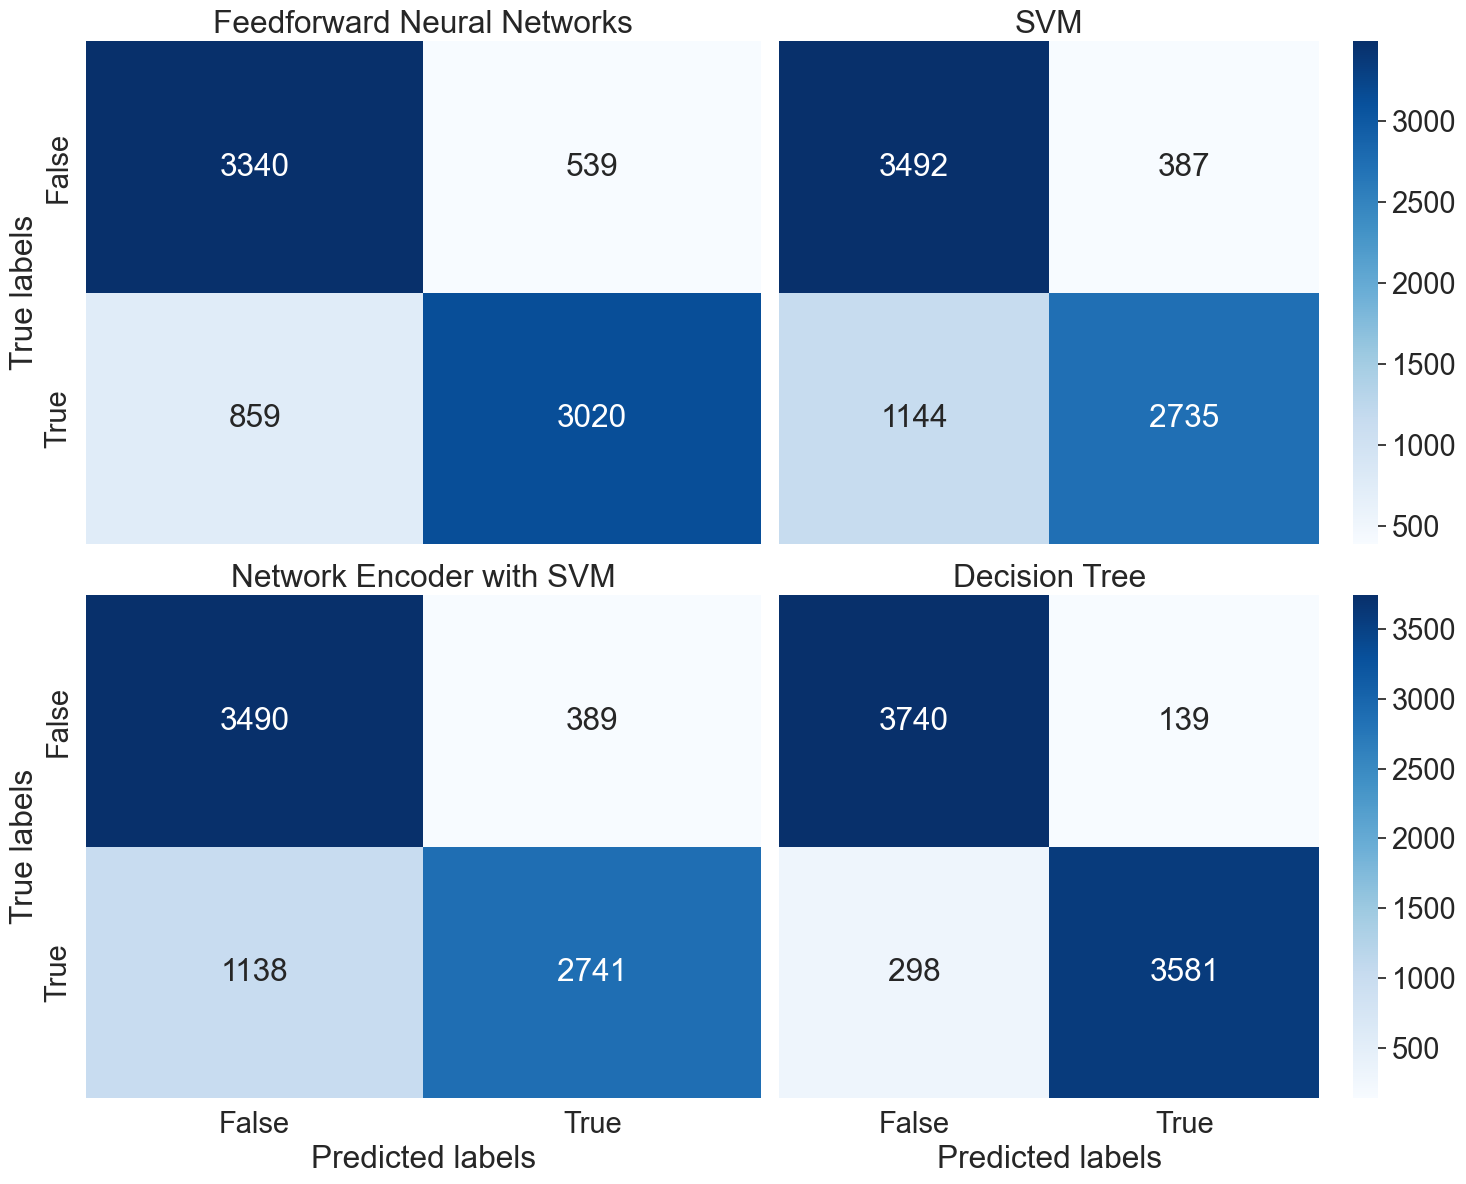

In [188]:

# Confusion matrix values for each model
confusion_matrices = {
    'Feedforward Neural Networks': [[3340, 539], [859, 3020]],
    'SVM': [[3492, 387], [1144, 2735]],
    'Network Encoder with SVM': [[3490, 389], [1138, 2741]],
    'Decision Tree': [[3740, 139], [298, 3581]]
}

# Increase the font size for the entire plot

# Set the overall font scale
sns.set(font_scale=1.9)

# Adjusting the heatmap color to a sky blue color palette and modifying axis labels and colorbar as requested
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Increase figure size for better legibility
axes = axes.flatten()

for i, (ax, (model, matrix)) in enumerate(zip(axes, confusion_matrices.items())):
    # Create the heatmap without the color bar for the first and third plots (index 0 and 2)
    color_bar = i not in [0, 2]
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=color_bar)
    ax.set_title(model)
    
    # Remove the xlabel for the first and second plots (index 0 and 1)
    if i in [0, 1]:  # for the top row
        ax.set_xlabel('')  
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Predicted labels')
        ax.xaxis.set_ticklabels(['False', 'True'])
    
    # Remove the ylabel for the second and fourth plots (index 1 and 3)
    if i in [1, 3]:  # for the right column
        ax.set_ylabel('')
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('True labels')
        ax.yaxis.set_ticklabels(['False', 'True'])

# Reset font scale back to default for future plots
sns.set(font_scale=1)

plt.tight_layout()
plt.savefig('MatrixC_ScenarioI.pdf')  # Salva a figura no formato PDF
plt.show()



### Results Scenario I

| Model Type                  | Accuracy | Recall  | Precision | F1-Score | Training Time (seconds) | Loss  | Best Parameters                                                                                                    | Confusion Matrix (TP, FP, FN, TN)  |
|-----------------------------|----------|---------|-----------|----------|-------------------------|-------|--------------------------------------------------------------------------------------------------------------------|------------------------------------|
| Feedforward Neural Networks | 82.00%   | 77.86%  | 84,86%    | 81.20%   | 10.17                   | 0.3328| Units1: 64, Units2: 32, Learning Rate: 0.01, Epochs: 20, Batch Size: 32, Patience: 5                               | 3340, 539, 859, 3020               |
| SVM                         | 80.27%   | 70.51%  | 87.60%    | 78.13%   | 4.83                    | -     | C: 100, Gamma: 'scale', Kernel: 'rbf'                                                                              | 3492, 387, 1144, 2735              |
| Network Encoder with SVM    | 80.32%   | 70.66%  | 87.57%    | 78.21%   | 408.33                  | -     | C: 100, Gamma: 'scale', Kernel: 'rbf'                                                                              | 3490, 389, 1138, 2741              |
| Decision Tree               | 94.37%   | 94.37%  | 94.44%    | 94.36%   | 4.95                    | -     | Criterion: 'entropy', Max Depth: 10, Min Samples Split: 2                                                          | 3740, 139, 298, 3581               |

# Ordinal Patterns Characteristics

## Processing Data

In [137]:
### Local

# Substitua 'caminho/para/seu/arquivo.xlsx' pelo caminho do seu arquivo Excel
file_name = '/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/HxC_data.xlsx'

# Leia o arquivo Excel em um DataFrame usando o pandas
data_HxC = pd.read_excel(file_name)

data_HxC.head()  # Isso mostrará as primeiras linhas do DataFrame carregado

,H,C,Feature,Machine,Dimension
0,0.839727,0.117138,Att1,G,3
1,0.843964,0.115386,Att1,B,3
2,0.800640,0.151950,Att1,G,4
3,0.800482,0.150695,Att1,B,4
4,0.770178,0.190161,Att1,G,5


In [120]:

# Mapear os valores da coluna 'Feature' para números de 1 a 6
data_HxC['Feature'] = data_HxC['Feature'].map({'Att1': 1, 'Att2': 2, 'Att3': 3, 'Att4': 4, 'Att5': 5, 'Att6': 6})
data_HxC.head()

# Separando os atributos das variáveis de destino
X = data_HxC.drop(columns=['Machine'])  # Atributos
y = data_HxC['Machine']  # Variável de destino

# Separando os dados por status
X_G = X[y == 'G']
X_B = X[y == 'B']
y_G = y[y == 'G']
y_B = y[y == 'B']

# Calculando o ponto de corte para cada status
cut_off_G = int(len(X_G) * 0.7)
cut_off_B = int(len(X_B) * 0.7)

# Criando os conjuntos de treinamento e teste
X_train = pd.concat([X_G[:cut_off_G], X_B[:cut_off_B]])
y_train = pd.concat([y_G[:cut_off_G], y_B[:cut_off_B]])
X_test = pd.concat([X_G[cut_off_G:], X_B[cut_off_B:]])
y_test = pd.concat([y_G[cut_off_G:], y_B[cut_off_B:]])

# Pré-processamento e normalização
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convertendo os rótulos para numéricos (por exemplo, 0 para "G" e 1 para "B")
y_train = y_train.map({'G': 0, 'B': 1})
y_test = y_test.map({'G': 0, 'B': 1})



In [144]:
from collections import Counter

# Contar quantos 0 e quantos 1 existem em y_train
count_train = Counter(y_train)
print(count_train)

# Contar quantos 0 e quantos 1 existem em y_test
count_test = Counter(y_test)
print(count_test)

Counter({0: 17, 1: 16})
Counter({1: 8, 0: 7})


## Feedforward Neural Networks (FNN) for Ordinal Patterns Characteristics

Training a neural network based on Ordinal Patterns values

**Entropy-Complexity Plane $H\times C$:** This begins by describing the representation of a set of time series of length $T$ in a symbolic space of ordinal patterns, which are then used to calculate permutation entropies and statistical complexity. We use the R package "statcomp" to implement metrics derived from Ordinal Patterns.

The analysis of Ordinal Patterns resulted in H (entropy) and C (complexity) metrics, which can be used as features to train a neural network model.

Having the H and C values calculated in a dataframe called "HxC" with the columns "H", "C", "Feature", "Machine", and "Dimension".

### Model

Epoch 1/10


2/2 [==============================] - 0s 64ms/step - loss: 0.7022 - accuracy: 0.5000 - val_loss: 0.7413 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 0.6998 - accuracy: 0.5000 - val_loss: 0.7373 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 0.6988 - accuracy: 0.5312 - val_loss: 0.7314 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 0.6976 - accuracy: 0.5312 - val_loss: 0.7268 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 12ms/step - loss: 0.6965 - accuracy: 0.5000 - val_loss: 0.7239 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 12ms/step - loss: 0.6959 - accuracy: 0.5000 - val_loss: 0.7208 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.7183 - val_accuracy: 0.5000
Epoch 8/10
2/2 [======================

Epoch 1/20
1/1 [==============================] - 0s 275ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6987 - accuracy: 0.5000 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.7035 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.7118 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6911 - accuracy: 0.5000 - val_loss: 0.7220 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6895 - accuracy: 0.5312 - val_loss: 0.7328 - val_accuracy: 0.5000


Melhor Precisão na Época: 1 com Acurácia: 0.5000
Tempo de Treinamento (segundos): 0.88
Epoch 1/30
1/1 [==============================] - 0s 298ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 3.1751 - val_accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 13ms/step - loss: 2.0564 - accuracy: 0.5000 - val_loss: 3.2442 - val_accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 14ms/step - loss: 2.4641 - accuracy: 0.5000 - val_loss: 0.9956 - val_accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 13ms/step - loss: 0.7838 - accuracy: 0.5000 - val_loss: 0.9653 - val_accuracy: 0.4375
Epoch 5/30
1/1 [==============================] - 0s 14ms/step - loss: 1.0140 - accuracy: 0.5000 - val_loss: 0.7303 - val_accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 0.7767 - accuracy: 0.5000 - val_loss: 0.7411 - val_accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 15ms/step - loss: 0.7175 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


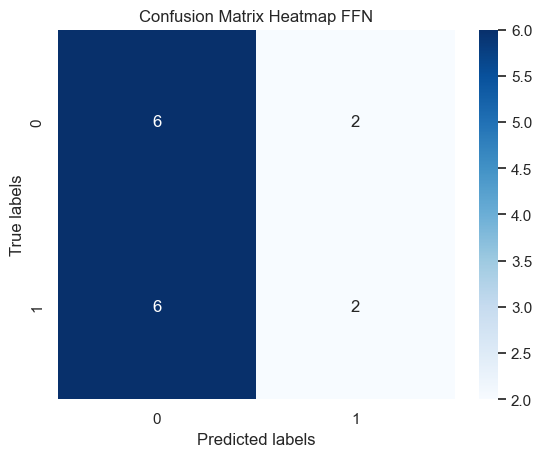

<Figure size 640x480 with 0 Axes>

In [204]:
# Função para criar, compilar e treinar o modelo
def train_model(params):
    model = keras.Sequential([
        keras.layers.Dense(params['units1'], activation='relu', input_shape=(X_train_normalized.shape[1],)),
        keras.layers.Dense(params['units2'], activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    early_stopping = tf.keras.callbacks.EarlyStopping(patience=params['patience'], restore_best_weights=True)

    history = model.fit(
        X_train_normalized, y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(X_test_normalized, y_test),
        callbacks=[early_stopping],
        verbose=1
    )

    return model, history

# Parâmetros a serem otimizados
param_grid = [
    {'units1': 32, 'units2': 16, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 16, 'patience': 3},
    {'units1': 64, 'units2': 32, 'learning_rate': 0.01, 'epochs': 20, 'batch_size': 32, 'patience': 5},
    {'units1': 128, 'units2': 64, 'learning_rate': 0.1, 'epochs': 30, 'batch_size': 64, 'patience': 7}
]

# Inicialização das variáveis
best_accuracy = 0
best_model = None
best_params = None  # Melhores parâmetros
best_epoch = None  # Melhor época

# Caminhos de salvamento do modelo e do otimizador
model_save_path = "melhor_modelo_checkpoint_HxC.h5"
optimizer_save_path = "melhor_optimizer_checkpoint_HxC.pkl"

# Inicie o cronômetro
start_time = time.time()

# Loop para treinamento
for params in param_grid:
    model, history = train_model(params)
    val_accuracy = max(history.history['val_accuracy'])
    current_best_epoch = history.history['val_accuracy'].index(val_accuracy) + 1
    print(f"Melhor Precisão na Época: {current_best_epoch} com Acurácia: {val_accuracy:.4f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model
        best_params = params
        best_epoch = current_best_epoch

    # Pare o cronômetro
    end_time = time.time()
    training_time = end_time - start_time

    # Exibindo o tempo de treinamento
    print(f"Tempo de Treinamento (segundos): {training_time:.2f}")

if best_model:
    # Avalie o modelo nos dados de teste
    test_loss, test_accuracy = best_model.evaluate(X_test_normalized, y_test, verbose=0)
    y_pred = best_model.predict(X_test_normalized)
    y_pred = (y_pred > 0.5).astype(int)  # Converta probabilidades para rótulos de classe 0 ou 1

    # Calcula métricas adicionais
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    best_f1_score = f1_score(y_test, y_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    # Imprime as métricas de desempenho
    print(f"Acurácia nos Dados de Teste: {test_accuracy:.4f}")
    print(f"Recall nos Dados de Teste: {recall:.4f}")
    print(f"Precision nos Dados de Teste: {precision:.4f}")
    print(f"F1-Score nos Dados de Teste: {best_f1_score:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(confusion_matrix_result)

    # Salve o melhor modelo treinado (incluindo otimizador)
    best_model.save(model_save_path)
    print("Melhor modelo salvo.")

    # Mostrar os melhores parâmetros
    print("Melhores Parâmetros:")
    print(best_params)

    # Crie um heatmap para a matriz de confusão
    sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix Heatmap FFN')
    plt.show()
    plt.savefig('confusionMatrix_FFN_HxC.pdf')  # Salva a figura no formato PDF

else:
    print("O treinamento não foi bem-sucedido.")

In [205]:
# Atualize o dicionário com todas as variáveis necessárias
variables_to_save_FFN_HxC = {
    'best_accuracy': best_accuracy,
    'best_model': best_model,  
    'best_params': best_params,
    'best_epoch': best_epoch,
    'training_time': training_time,
    'test_accuracy': test_accuracy,  
    'best_f1_score': best_f1_score,  
    'confusion_matrix_result': confusion_matrix_result  
}

# Salve as variáveis em um arquivo pickle
with open('/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/variables_to_save_FFN_HxC.pkl', 'wb') as f:
    pickle.dump(variables_to_save_FFN_HxC, f)
print("Variáveis salvas com sucesso.")


# # Carregue as variáveis do arquivo pickle
# with open('variables_to_save_FFN_HxC', 'rb') as f:
#     loaded_variables = pickle.load(f)

# # Agora você pode acessar as variáveis carregadas:
# best_accuracy = loaded_variables['best_accuracy']
# best_model = loaded_variables['best_model']
# best_params = loaded_variables['best_params']
# best_time = loaded_variables['best_time']
# confusion_matrix_result: loaded_variables[confusion_matrix_result]
# print("Variáveis carregadas com sucesso.")

Variáveis salvas com sucesso.


## Support Vector Machines (SVM) for Ordinal Patterns Characteristics


### Model

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.429 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

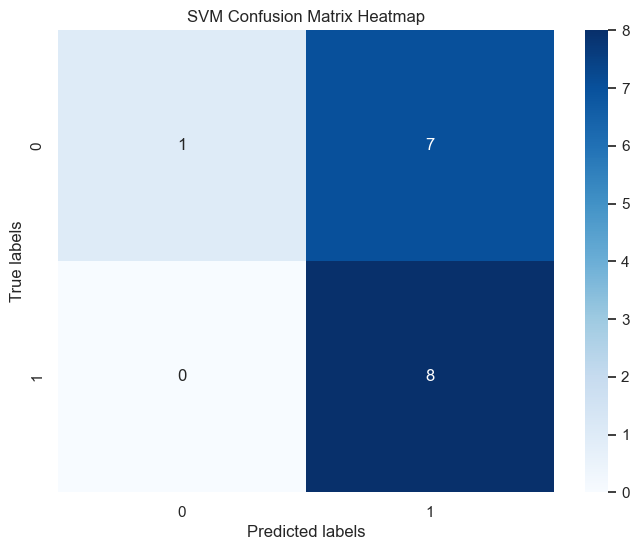

<Figure size 640x480 with 0 Axes>

In [207]:

# Definição do grid de hiperparâmetros para GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Inicialização do GridSearchCV com o modelo SVM
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinamento do modelo SVM com GridSearchCV para encontrar os melhores hiperparâmetros
start_time = time.time()
svm_grid_search.fit(X_train_normalized, y_train)
training_time = time.time() - start_time

# Avaliação do melhor modelo SVM encontrado pelo GridSearchCV
best_svm_model = svm_grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_normalized)

# Calcula as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe os resultados
print('Best Parameters:', svm_grid_search.best_params_)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f"Training Time SVM: {training_time:.2f} seconds")

# Salvando as variáveis e o modelo para uso posterior
variables_to_save_svm_HxC = {
    'best_accuracy': accuracy,
    'best_model': best_svm_model,
    'best_params': svm_grid_search.best_params_,
    'best_time': training_time,
    'confusion_matrix_result': conf_matrix,
    'recall': recall,
    'precision': precision,
    'f1_score': f1,
}

# Salve as variáveis e o modelo em arquivos
model_save_path = "best_svm_model_HxC.pkl"
variables_save_path = 'variables_to_save_svm_HxC.pkl'
joblib.dump(best_svm_model, model_save_path)
with open(variables_save_path, 'wb') as f:
    pickle.dump(variables_to_save_svm_HxC, f)

print("Melhor modelo e variáveis salvas com sucesso.")

# Crie e exiba o heatmap da Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix Heatmap')
plt.show()
plt.savefig('svm_confusion_matrix_heatmap_HxC.pdf')  # Salva a figura no formato PDF


## Network Encoder for Ordinal Patterns Characteristics winth SVM


### Model

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Melhor perda de validação: 0.1547052413225174
Melhores parâmetros: {'encoding_dim': 32, 'activation': 'tanh'}
1/1 [==============================] - 0s 22ms/step
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.429 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf

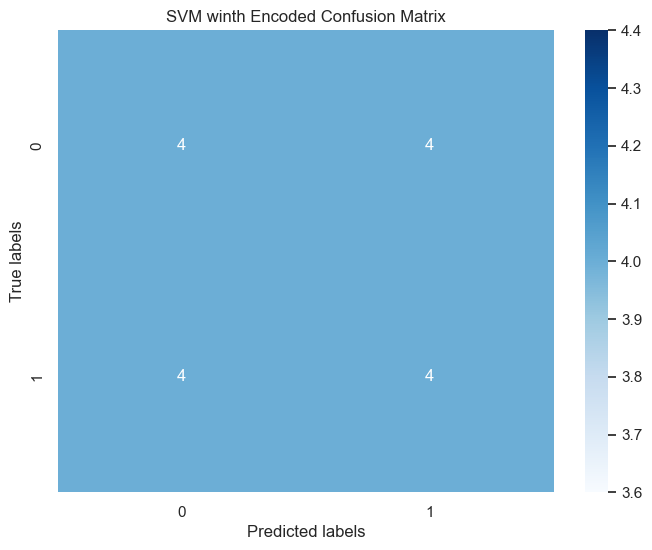

In [209]:

def train_autoencoder(params_grid):
    best_loss = float('inf')
    best_model = None
    best_params = {}
    for encoding_dim in params_grid['encoding_dim']:
        for activation in params_grid['activation']:
            model = Sequential([
                Dense(encoding_dim, activation=activation, input_shape=(X_train_normalized.shape[1],)),
                Dense(X_train_normalized.shape[1], activation='linear')
            ])
            model.compile(optimizer='adam', loss='mean_squared_error')
            history = model.fit(
                X_train_normalized, X_train_normalized,
                epochs=100, batch_size=32, validation_split=0.2,
                callbacks=[EarlyStopping(monitor='val_loss', patience=3)], verbose=0
            )
            val_loss = history.history['val_loss'][-1]
            if val_loss < best_loss:
                best_loss = val_loss
                best_model = model
                best_params = {'encoding_dim': encoding_dim, 'activation': activation}
                model.save('best_autoencoder_model_HxC.h5')
    print(f"Melhor perda de validação: {best_loss}")
    print(f"Melhores parâmetros: {best_params}")
    return best_model

# # Carregar o melhor modelo de Autoencoder salvo anteriormente
# best_autoencoder_model = load_model('best_autoencoder_model_HxC.h5')

def train_svm(encoded_data_train, y_train, param_grid):
    svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=3)
    start_time = time.time()
    svm_grid_search.fit(encoded_data_train, y_train)
    training_time = time.time() - start_time
    best_svm_model = svm_grid_search.best_estimator_
    print(f"Tempo de Treinamento SVM: {training_time:.2f} segundos")
    return best_svm_model, svm_grid_search.best_params_

# Treinar autoencoder
best_autoencoder_model = train_autoencoder({
    'encoding_dim': [8, 16, 32],
    'activation': ['relu', 'tanh']
})

# Codificar os dados
encoded_data_train = best_autoencoder_model.predict(X_train_normalized)
encoded_data_test = best_autoencoder_model.predict(X_test_normalized)

# Treinar SVM com dados codificados
best_svm_model, best_svm_params = train_svm(encoded_data_train, y_train, {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
})

# Avaliar e salvar o modelo SVM
y_pred = best_svm_model.predict(encoded_data_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Melhores Parâmetros:', best_svm_params)
print('Acurácia:', accuracy)
print('Recall:', recall)
print('Precisão:', precision)
print('F1-Score:', f1)

# Salvar o melhor modelo SVM
joblib.dump(best_svm_model, 'best_svmEncoder_model_HxC.pkl')

# Criar e exibir o heatmap da matriz de confusão
confusion_matrix_result = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM winth Encoded Confusion Matrix')
plt.savefig('confusionMatrix_HxC_EncoderSVM.pdf')
plt.show()


In [210]:

variables_to_save_EncodeSVM_HxC = {
    'accuracy': accuracy,
    'recall': recall,
    'precision': precision,
    'f1_score': f1,
    'confusion_matrix': confusion_matrix_result,
    'best_params': best_svm_params,
}

# Caminho do arquivo onde as variáveis serão salvas
variables_save_path = 'variables_to_save_EncodeSVM_HxC.pkl'

# Salvando as variáveis para uso posterior
with open(variables_save_path, 'wb') as file:
    pickle.dump(variables_to_save_EncodeSVM_HxC, file)
print("Variáveis salvas com sucesso.")


# # Carregando as variáveis salvas anteriormente
# with open(variables_to_save_EncodeSVM_HxC, 'rb') as file:
#     loaded_variables = pickle.load(file)
# print("Variáveis carregadas com sucesso.")

# # Acessando variáveis carregadas
# accuracy_loaded = loaded_variables['accuracy']
# recall_loaded = loaded_variables['recall']
# precision_loaded = loaded_variables['precision']
# f1_score_loaded = loaded_variables['f1_score']
# confusion_matrix_loaded = loaded_variables['confusion_matrix']
# best_params_loaded = loaded_variables['best_params']



Variáveis salvas com sucesso.


## Decision Tree Ordinal Patterns Characteristics


### Model

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.286 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.286 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.667 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples

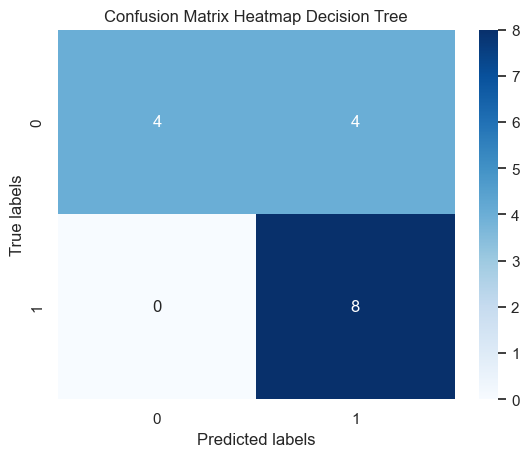

<Figure size 640x480 with 0 Axes>

In [211]:
# Configuração do GridSearchCV para Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}

# Inicialização do GridSearchCV com o modelo de árvore de decisão
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinamento do modelo de árvore de decisão com GridSearchCV para encontrar os melhores hiperparâmetros
start_time = time.time()
decision_tree_grid_search.fit(X_train_normalized, y_train)
training_time = time.time() - start_time

# Avaliação do melhor modelo de árvore de decisão encontrado pelo GridSearchCV
best_decision_tree_model = decision_tree_grid_search.best_estimator_
y_pred = best_decision_tree_model.predict(X_test_normalized)

# Calcula as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calcula a matriz de confusão e depois cria o heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe as melhores configurações e métricas
print('Best Parameters:', decision_tree_grid_search.best_params_)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f"Training Time Decision Tree: {training_time:.2f} seconds")

# Salve o melhor modelo de árvore de decisão
model_save_path = "best_model_decision_tree_HxC.pkl"
joblib.dump(best_decision_tree_model, model_save_path)

# Crie um gráfico de calor para a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap Decision Tree')
plt.show()
plt.savefig('confusionMatrix_model_Decision_Tree_HxC.pdf')  # Salva a figura no formato PDF

In [213]:
variables_to_save_DecisionTree_HxC = {
    'accuracy': accuracy,
    'recall': recall,
    'precision': precision,
    'f1_score': f1,
    'confusion_matrix': confusion_matrix_result,
    'best_params': best_svm_params,
}

# Caminho do arquivo onde as variáveis serão salvas
variables_save_path = 'variables_to_save_DecisionTree_HxC.pkl'

# Salvando as variáveis para uso posterior
with open(variables_save_path, 'wb') as file:
    pickle.dump(variables_to_save_DecisionTree_HxC, file)
print("Variáveis salvas com sucesso.")


# # Carregando as variáveis salvas anteriormente
# with open(variables_to_save_DecisionTree_HxC, 'rb') as file:
#     loaded_variables = pickle.load(file)
# print("Variáveis carregadas com sucesso.")

# # Acessando variáveis carregadas
# accuracy_loaded = loaded_variables['accuracy']
# recall_loaded = loaded_variables['recall']
# precision_loaded = loaded_variables['precision']
# f1_score_loaded = loaded_variables['f1_score']
# confusion_matrix_loaded = loaded_variables['confusion_matrix']
# best_params_loaded = loaded_variables['best_params']


Variáveis salvas com sucesso.


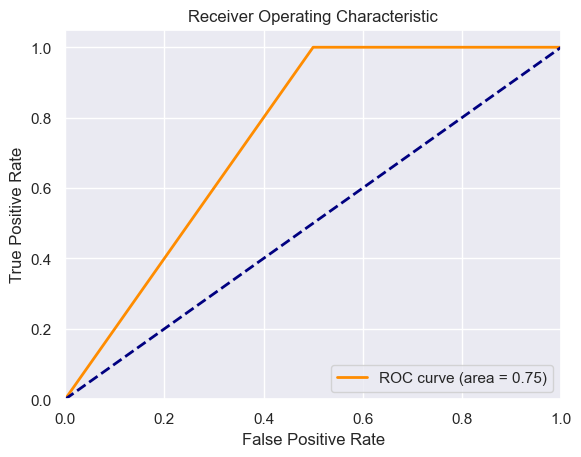

In [212]:
# `y_test` são os rótulos verdadeiros e `decision_tree_model` é o modelo já treinado
y_probs = best_decision_tree_model.predict_proba(X_test_normalized)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curve_HxC_DecisionT.pdf')  # Salva a figura no formato PDF
# plt.close()

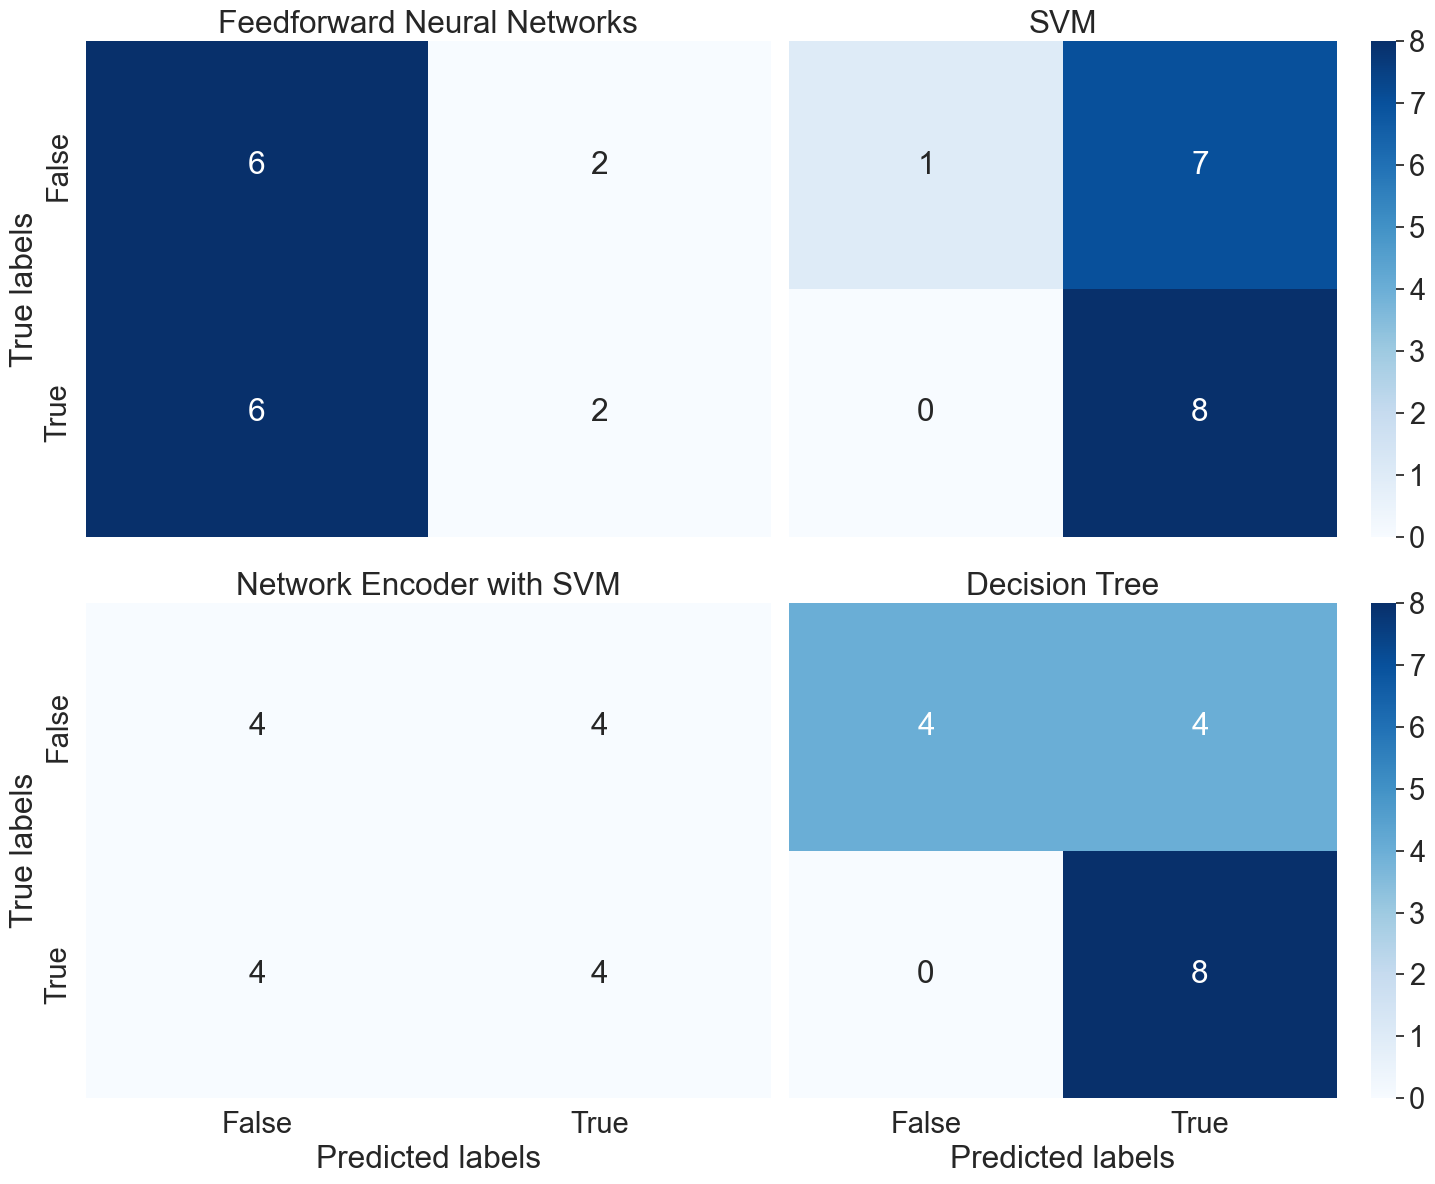

In [214]:
# Confusion matrix values for each model
confusion_matrices = {
    'Feedforward Neural Networks': [[6, 2], [6, 2]],
    'SVM': [[1, 7], [ 0, 8]],
    'Network Encoder with SVM': [[4, 4], [4, 4]],
    'Decision Tree': [[4, 4], [0, 8]]
}

# Set the overall font scale
sns.set(font_scale=1.9)

# Adjusting the heatmap color to a sky blue color palette and modifying axis labels and colorbar as requested
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Increase figure size for better legibility
axes = axes.flatten()

for i, (ax, (model, matrix)) in enumerate(zip(axes, confusion_matrices.items())):
    # Create the heatmap without the color bar for the first and third plots (index 0 and 2)
    color_bar = i not in [0, 2]
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=color_bar)
    ax.set_title(model)
    
    # Remove the xlabel for the first and second plots (index 0 and 1)
    if i in [0, 1]:  # for the top row
        ax.set_xlabel('')
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Predicted labels')
        ax.xaxis.set_ticklabels(['False', 'True'])
    
    # Remove the ylabel for the second and fourth plots (index 1 and 3)
    if i in [1, 3]:  # for the right column
        ax.set_ylabel('')
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('True labels')
        ax.yaxis.set_ticklabels(['False', 'True'])

# Reset font scale back to default for future plots
sns.set(font_scale=1)

plt.tight_layout()
plt.savefig('MatrixC_ScenarioII.pdf')  # Salva a figura no formato PDF
plt.show()


### Results Scenario II

| Model Type                  | Accuracy | Recall  | Precision | F1-Score | Training Time (seconds) | Best Parameters                                                                                        | Confusion Matrix (TP, FP, FN, TN) |
|-----------------------------|----------|---------|-----------|----------|-------------------------|--------------------------------------------------------------------------------------------------------|-----------------------------------|
| Feedforward Neural Networks | 50.00%   | 25.00%  | 50.00%    | 33.33%   | 1.43                    | Units1: 128, Units2: 64, Learning Rate: 0.1, Epochs: 30, Batch Size: 64, Patience: 7                   | 6, 2, 6, 2                        |
| SVM                         | 56.25%   | 100.00% | 53.33%    | 69.57%   | 0.08                    | C: 10, Gamma: 1, Kernel: 'rbf'                                                                         | 1, 7, 0, 8                        |
| Network Encoder with SVM    | 50.00%   | 50.00%  | 50.00%    | 50.00%   | 0.06                    | C: 0.1, Gamma: 'scale', Kernel: 'rbf'                                                                  | 4, 4, 4, 4                        |
| Decision Tree               | 75.00%   | 75.00%  | 83.33%    | 73.33%   | 0.15                    | Criterion: 'gini', Max Depth: 20, Min Samples Split: 2                                                 | 4, 4, 0, 8                        |


## Support Vector Machines (SVM) for Ordinal Patterns Characteristics TimeSeriesSMOTE

The problem of having few instances for training can be challenging, but there are some strategies we can consider to improve the results:

* Resampling and Data Augmentation:

    Apply resampling techniques, such as oversampling the minority class or data augmentation techniques, to generate additional instances.

    The use of SMOTE (Synthetic Minority Over-sampling Technique) with SVM for ordinal patterns is important to note that SMOTE is commonly applied in the context of imbalanced datasets to oversample the minority class.

    The main objective of applying TimeSeriesSMOTE is to address the class imbalance in the time series dataset by generating synthetic samples of the minority class. This can be beneficial for improving the performance of machine learning models, especially in scenarios where one class is underrepresented.

    TimeSeriesSMOTE can be used in problems with few features, especially when the lack of data or imbalance between classes is impacting the training of machine learning models. TimeSeriesSMOTE is an extension of SMOTE specifically designed to handle temporal data, and its application can help improve model performance even in datasets with few features.

    Few Training Instances: In datasets with few training instances, generating synthetic examples with TimeSeriesSMOTE can increase the amount of data available for training, helping models to learn more robust patterns.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.429 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

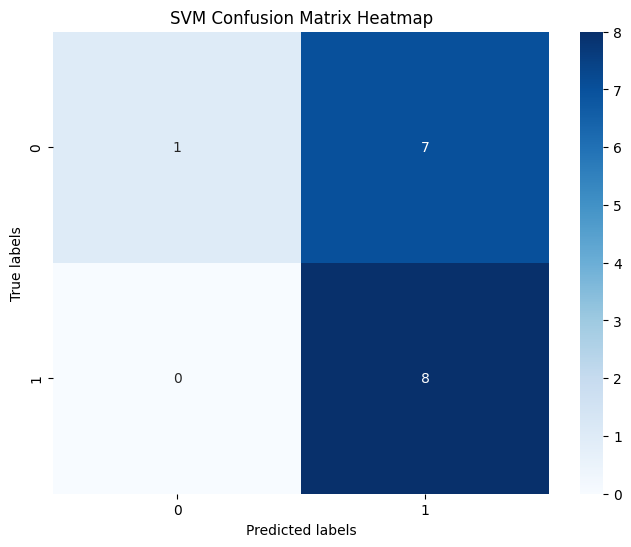

<Figure size 640x480 with 0 Axes>

In [108]:
# # Instalando a biblioteca imbalanced-learn
# !pip install -q imbalanced-learn

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import pickle

# Convertendo os rótulos para numéricos (0 para "G" e 1 para "B")
y_train_numeric = y_train
y_test_numeric = y_test

# # Verificando e tratando valores NaN nos rótulos
# y_train_numeric = y_train_numeric.dropna()

# Aplicando SMOTE nos dados de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_normalized, y_train_numeric)

# Definição do grid de hiperparâmetros para GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Inicialização do GridSearchCV com o modelo SVM
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinamento do modelo SVM com GridSearchCV para encontrar os melhores hiperparâmetros
start_time = time.time()
svm_grid_search.fit(X_train_resampled, y_train_resampled)
training_time = time.time() - start_time

# Avaliação do melhor modelo SVM encontrado pelo GridSearchCV
best_svm_model = svm_grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_normalized)

# Calcula as métricas de desempenho
accuracy = accuracy_score(y_test_numeric, y_pred)
recall = recall_score(y_test_numeric, y_pred)
precision = precision_score(y_test_numeric, y_pred)
f1 = f1_score(y_test_numeric, y_pred)
conf_matrix = confusion_matrix(y_test_numeric, y_pred)

# Exibe os resultados
print('Best Parameters:', svm_grid_search.best_params_)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f"Training Time SVM: {training_time:.2f} seconds")

# Salvando as variáveis e o modelo para uso posterior
variables_to_save_svm_HxC_SMOTE = {
    'best_accuracy': accuracy,
    'best_model': best_svm_model,
    'best_params': svm_grid_search.best_params_,
    'best_time': training_time,
    'confusion_matrix_result': conf_matrix,
    'recall': recall,
    'precision': precision,
    'f1_score': f1,
}

# Salve as variáveis e o modelo em arquivos
model_save_path = "/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/Model/best_svm_model_HxC_SMOTE.pkl"
variables_save_path= '/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/Model/variables_to_save_svm_HxC_SMOTE.pkl'
joblib.dump(best_svm_model, model_save_path)
with open(variables_save_path, 'wb') as f:
    pickle.dump(variables_to_save_svm_HxC_SMOTE, f)

print("Melhor modelo e variáveis salvas com sucesso.")

# Crie e exiba o heatmap da Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix Heatmap')
plt.show()
plt.savefig('/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/Model/svm_confusion_matrix_heatmap_HxC_SMOTE.pdf')  # Salva a figura no formato PDF


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Confusion Matrix:
 [[1 7]
 [0 8]]
Accuracy: 0.5625
Recall: 1.0000
Precision: 0.5333
F1-Score: 0.6957
Training Time SVM: 0.07 seconds

# Traditional and Ordinal Patterns Characteristics

## Preprocessing Data

1. **Data Type Conversion:**
* The "Dimension" column is converted from categorical type (chr) to numeric type (dbl).

2. **Transforming Columns "Att1" to "Att6" into a Single "Feature" Column:**
* The columns "Att1" to "Att6" are merged into a single column called "Feature". This creates a "long" format of the data, where each value from "Att1" to "Att6" is placed in the "Value" column and the "Feature" column indicates the origin of the value.

3. **Column Renaming:**
* The "Status" column is renamed to "Machine" using the rename function.

4. **Joining DataFrames:**
* The original dataframes (data2 and data1) are joined based on the "Machine" and "Feature" columns. The result is stored in the variable result. This combines the information from the "Att1" to "Att6" values with the information from the "Machine" column (formerly "Status") and "Dimension".

5. **Modification of the "Feature" Attribute:**
* The "Feature" column is converted to numeric type (dbl).
* The levels of the "Feature" column are set as numbers from 1 to 6.

We separate the data for each category 'Machine', 'Machine G', and 'Machine B'. Then, we choose an individual temporal cutoff point for each category so that 70% of the data from each category is used for training and the remaining 30% for testing. This ensures that we have 70% of each category for training.


## Processing Data

In [3]:
# # Faça o upload do arquivo Excel do seu computador
# uploaded = files.upload()

# # Especifique o nome do arquivo que você enviou
# file_name = list(uploaded.keys())[0]

# # Leia o arquivo Excel em um DataFrame usando o pandas
# data_Trad_HxC = pd.read_excel(file_name)

# data_Trad_HxC.head()  # Isso mostrará as primeiras linhas do DataFrame carregado


Saving HxC_and_Trad_data.xlsx to HxC_and_Trad_data.xlsx


,Machine,Feature,Value,H,C,Dimension
0,G,1,57.1,0.839727,0.117138,3
1,G,1,57.1,0.800640,0.151950,4
2,G,1,57.1,0.770178,0.190161,5
3,G,1,57.1,0.742660,0.238894,6
4,G,2,25.7,0.871158,0.100721,3


In [215]:
### Local

# Substitua 'caminho/para/seu/arquivo.xlsx' pelo caminho do seu arquivo Excel
file_name = '/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/HxC_and_Trad_data.xlsx'

# Leia o arquivo Excel em um DataFrame usando o pandas
data_Trad_HxC = pd.read_excel(file_name)

data_Trad_HxC.head()  # Isso mostrará as primeiras linhas do DataFrame carregado

,Machine,Feature,Value,H,C,Dimension
0,G,1,57.1,0.839727,0.117138,3
1,G,1,57.1,0.800640,0.151950,4
2,G,1,57.1,0.770178,0.190161,5
3,G,1,57.1,0.742660,0.238894,6
4,G,2,25.7,0.871158,0.100721,3


In [216]:

# Separando os atributos das variáveis de destino
X = data_Trad_HxC.drop(columns=['Machine'])  # Atributos
y = data_Trad_HxC['Machine']  # Variável de destino

# Separando os dados por status
X_G = X[y == 'G']
X_B = X[y == 'B']
y_G = y[y == 'G']
y_B = y[y == 'B']

# Calculando o ponto de corte para cada status
cut_off_G = int(len(X_G) * 0.7)
cut_off_B = int(len(X_B) * 0.7)

# Criando os conjuntos de treinamento e teste
X_train = pd.concat([X_G[:cut_off_G], X_B[:cut_off_B]])
y_train = pd.concat([y_G[:cut_off_G], y_B[:cut_off_B]])
X_test = pd.concat([X_G[cut_off_G:], X_B[cut_off_B:]])
y_test = pd.concat([y_G[cut_off_G:], y_B[cut_off_B:]])

# Pré-processamento e normalização
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convertendo os rótulos para numéricos (por exemplo, 0 para "G" e 1 para "B")
y_train = y_train.map({'G': 0, 'B': 1})
y_test = y_test.map({'G': 0, 'B': 1})


In [217]:

# Contar quantos 0 e quantos 1 existem em y_train
count_train = Counter(y_train)
print(count_train)

# Contar quantos 0 e quantos 1 existem em y_test
count_test = Counter(y_test)
print(count_test)

Counter({0: 217207, 1: 217173})
Counter({0: 93089, 1: 93075})



## Feedforward Neural Networks (FNN) with Traditional and Ordinal Patterns Characteristics

### Model

Epoch 1/10
27149/27149 [==============================] - 16s 563us/step - loss: 0.3385 - accuracy: 0.8321 - val_loss: 0.1718 - val_accuracy: 0.9380
Epoch 2/10
27149/27149 [==============================] - 16s 573us/step - loss: 0.1200 - accuracy: 0.9495 - val_loss: 0.0991 - val_accuracy: 0.9736
Epoch 3/10
27149/27149 [==============================] - 15s 569us/step - loss: 0.0794 - accuracy: 0.9651 - val_loss: 0.0911 - val_accuracy: 0.9578
Epoch 4/10
27149/27149 [==============================] - 15s 568us/step - loss: 0.0707 - accuracy: 0.9692 - val_loss: 0.0939 - val_accuracy: 0.9559
Epoch 5/10
27149/27149 [==============================] - 16s 571us/step - loss: 0.0599 - accuracy: 0.9728 - val_loss: 0.0791 - val_accuracy: 0.9905
Epoch 6/10
27149/27149 [==============================] - 15s 567us/step - loss: 0.0544 - accuracy: 0.9762 - val_loss: 0.0762 - val_accuracy: 0.9932
Epoch 7/10
27149/27149 [==============================] - 15s 568us/step - loss: 0.0520 - accuracy: 0.9782

Melhor Precisão na Época: 6 com Acurácia: 0.9932
Tempo de Treinamento (segundos): 154.64
Epoch 1/20
13575/13575 [==============================] - 8s 585us/step - loss: 0.3684 - accuracy: 0.7518 - val_loss: 0.4355 - val_accuracy: 0.7159
Epoch 2/20
13575/13575 [==============================] - 8s 586us/step - loss: 0.3692 - accuracy: 0.7455 - val_loss: 0.3650 - val_accuracy: 0.7372
Epoch 3/20
13575/13575 [==============================] - 8s 582us/step - loss: 0.3632 - accuracy: 0.7476 - val_loss: 0.3431 - val_accuracy: 0.7585
Epoch 4/20
13575/13575 [==============================] - 8s 583us/step - loss: 0.3424 - accuracy: 0.7543 - val_loss: 0.3413 - val_accuracy: 0.7499
Epoch 5/20
13575/13575 [==============================] - 8s 581us/step - loss: 0.3757 - accuracy: 0.7358 - val_loss: 0.3999 - val_accuracy: 0.7047
Epoch 6/20
13575/13575 [==============================] - 8s 587us/step - loss: 0.4305 - accuracy: 0.7105 - val_loss: 0.4816 - val_accuracy: 0.6904
Epoch 7/20
13575/13575 

Melhor Precisão na Época: 3 com Acurácia: 0.7585
Tempo de Treinamento (segundos): 226.35
Epoch 1/30
6788/6788 [==============================] - 5s 653us/step - loss: 0.6911 - accuracy: 0.5034 - val_loss: 0.6873 - val_accuracy: 0.5088
Epoch 2/30
6788/6788 [==============================] - 4s 655us/step - loss: 0.6903 - accuracy: 0.5045 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 3/30
6788/6788 [==============================] - 4s 646us/step - loss: 0.6903 - accuracy: 0.5035 - val_loss: 0.6871 - val_accuracy: 0.5088
Epoch 4/30
6788/6788 [==============================] - 4s 652us/step - loss: 0.6902 - accuracy: 0.5027 - val_loss: 0.6880 - val_accuracy: 0.5088
Epoch 5/30
6788/6788 [==============================] - 4s 647us/step - loss: 0.6902 - accuracy: 0.5031 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 6/30
6788/6788 [==============================] - 4s 651us/step - loss: 0.6902 - accuracy: 0.5035 - val_loss: 0.6879 - val_accuracy: 0.5088
Epoch 7/30
6788/6788 [=============

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


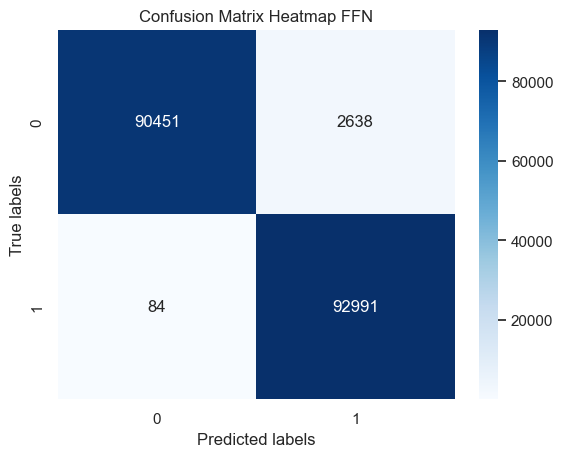

<Figure size 640x480 with 0 Axes>

In [218]:
# Função para criar, compilar e treinar o modelo
def train_model(params):
    model = keras.Sequential([
        keras.layers.Dense(params['units1'], activation='relu', input_shape=(X_train_normalized.shape[1],)),
        keras.layers.Dense(params['units2'], activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    early_stopping = tf.keras.callbacks.EarlyStopping(patience=params['patience'], restore_best_weights=True)

    history = model.fit(
        X_train_normalized, y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(X_test_normalized, y_test),
        callbacks=[early_stopping],
        verbose=1
    )

    return model, history

# Parâmetros a serem otimizados
param_grid = [
    {'units1': 32, 'units2': 16, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 16, 'patience': 3},
    {'units1': 64, 'units2': 32, 'learning_rate': 0.01, 'epochs': 20, 'batch_size': 32, 'patience': 5},
    {'units1': 128, 'units2': 64, 'learning_rate': 0.1, 'epochs': 30, 'batch_size': 64, 'patience': 7}
]

# Inicialização das variáveis
best_accuracy = 0
best_model = None
best_params = None  # Melhores parâmetros
best_epoch = None  # Melhor época

# Caminhos de salvamento do modelo e do otimizador
model_save_path = "melhor_modelo_checkpoint_OrdHxC.h5"
optimizer_save_path = "melhor_optimizer_checkpoint_OrdHxC.pkl"

# Inicie o cronômetro
start_time = time.time()

# Loop para treinamento
for params in param_grid:
    model, history = train_model(params)
    val_accuracy = max(history.history['val_accuracy'])
    current_best_epoch = history.history['val_accuracy'].index(val_accuracy) + 1
    print(f"Melhor Precisão na Época: {current_best_epoch} com Acurácia: {val_accuracy:.4f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model
        best_params = params
        best_epoch = current_best_epoch

    # Pare o cronômetro
    end_time = time.time()
    training_time = end_time - start_time

    # Exibindo o tempo de treinamento
    print(f"Tempo de Treinamento (segundos): {training_time:.2f}")

if best_model:
    # Avalie o modelo nos dados de teste
    test_loss, test_accuracy = best_model.evaluate(X_test_normalized, y_test, verbose=0)
    y_pred = best_model.predict(X_test_normalized)
    y_pred = (y_pred > 0.5).astype(int)  # Converta probabilidades para rótulos de classe 0 ou 1

    # Calcula métricas adicionais
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    best_f1_score = f1_score(y_test, y_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    # Imprime as métricas de desempenho
    print(f"Acurácia nos Dados de Teste: {test_accuracy:.4f}")
    print(f"Recall nos Dados de Teste: {recall:.4f}")
    print(f"Precision nos Dados de Teste: {precision:.4f}")
    print(f"F1-Score nos Dados de Teste: {best_f1_score:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(confusion_matrix_result)

    # Salve o melhor modelo treinado (incluindo otimizador)
    best_model.save(model_save_path)
    print("Melhor modelo salvo.")

    # Mostrar os melhores parâmetros
    print("Melhores Parâmetros:")
    print(best_params)

    # Crie um heatmap para a matriz de confusão
    sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix Heatmap FFN')
    plt.show()
    plt.savefig('confusionMatrix_FFN_OrdHxC.pdf')  # Salva a figura no formato PDF

else:
    print("O treinamento não foi bem-sucedido.")

In [78]:

# Atualize o dicionário com todas as variáveis necessárias
variables_to_save_RNAOrdTrad = {
    'best_accuracy': best_accuracy,
    'best_model': best_model,  # Isso salvará a referência do modelo, não o modelo em si
    'best_params': best_params,
    'best_epoch': best_epoch,
    'training_time': training_time,
    'test_accuracy': test_accuracy,  # Você precisa definir esta variável com a precisão do teste
    'best_f1_score': best_f1_score,  # Defina esta variável após calcular o F1 score
    'confusion_matrix_result': confusion_matrix_result  # Defina esta variável após calcular a matriz de confusão
    # Inclua outras variáveis aqui conforme necessário
}

# Salve as variáveis em um arquivo pickle
with open('/Users/keilabarbosa/Documents/TeseKeilaBarbosa/Code/variables_to_save_RNAOrdTrad.pkl', 'wb') as f:
    pickle.dump(variables_to_save_RNAOrdTrad, f)
print("Variáveis salvas com sucesso.")


# # Carregue as variáveis do arquivo pickle
# with open('variables_to_save_RNAOrdTrad.pkl', 'rb') as f:
#     loaded_variables = pickle.load(f)

# # Agora você pode acessar as variáveis carregadas, por exemplo:
# best_accuracy = loaded_variables['best_accuracy']
# best_model = loaded_variables['best_model']
# best_params = loaded_variables['best_params']
# best_time = loaded_variables['best_time']
# confusion_matrix_result: loaded_variables[confusion_matrix_result]
# print("Variáveis carregadas com sucesso.")

Variáveis salvas com sucesso.


## Support Vector Machines (SVM) with Traditional and Ordinal Patterns Characteristics


### Model

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.773 total time=50.8min
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.770 total time=56.6min
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.737 total time=58.7min
[CV 4/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=0.769 total time=116.2min
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.776 total time=53.6min
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.535 total time=69.7min
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.503 total time=72.3min
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.502 total time=64.7min
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.512 total time=64.2min
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.512 total time=67.1min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=72.7min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

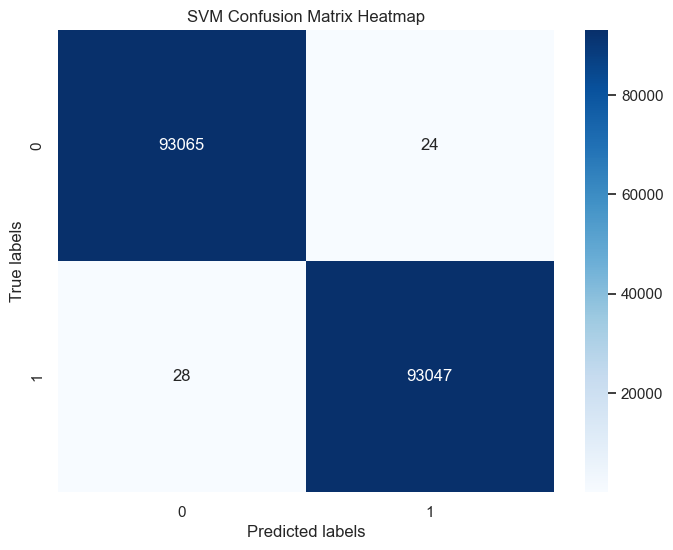

<Figure size 640x480 with 0 Axes>

In [219]:
# Definição do grid de hiperparâmetros para GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Inicialização do GridSearchCV com o modelo SVM
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinamento do modelo SVM com GridSearchCV para encontrar os melhores hiperparâmetros
start_time = time.time()
svm_grid_search.fit(X_train_normalized, y_train)
training_time = time.time() - start_time

# Avaliação do melhor modelo SVM encontrado pelo GridSearchCV
best_svm_model = svm_grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_normalized)

# Calcula as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe os resultados
print('Best Parameters:', svm_grid_search.best_params_)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f"Training Time SVM: {training_time:.2f} seconds")

# Salvando as variáveis e o modelo para uso posterior
variables_to_save_svm_HxCOrd = {
    'best_accuracy': accuracy,
    'best_model': best_svm_model,
    'best_params': svm_grid_search.best_params_,
    'best_time': training_time,
    'confusion_matrix_result': conf_matrix,
    'recall': recall,
    'precision': precision,
    'f1_score': f1,
}

# Salve as variáveis e o modelo em arquivos
model_save_path = "best_svm_model_HxCOrd.pkl"
variables_save_path = 'variables_to_save_svm_HxCOrd.pkl'
joblib.dump(best_svm_model, model_save_path)
with open(variables_save_path, 'wb') as f:
    pickle.dump(variables_to_save_svm_HxCOrd, f)

print("Melhor modelo e variáveis salvas com sucesso.")

# Crie e exiba o heatmap da Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix Heatmap')
plt.show()
plt.savefig('svm_confusion_matrix_heatmap_HxCOrd.pdf')  # Salva a figura no formato PDF

## Network Encoder with Traditional and Ordinal Patterns Characteristics for SVM

### Model

In [31]:
# Inicialização da melhor perda de validação e modelo
best_loss = float('inf')
best_autoencoder_model = None
best_params = {}

# Defina o grid de hiperparâmetros para o Autoencoder
autoencoder_params_grid = {
    'encoding_dim': [8, 16, 32],
    'activation': ['relu', 'tanh']
}

# Loop para iterar sobre o grid de hiperparâmetros
for encoding_dim in autoencoder_params_grid['encoding_dim']:
    for activation in autoencoder_params_grid['activation']:
        # Construa o modelo para cada combinação de hiperparâmetros
        autoencoder_model = Sequential([
            Dense(encoding_dim, activation=activation, input_shape=(X_train_normalized.shape[1],)),
            Dense(X_train_normalized.shape[1], activation='linear')
        ])

        # Compile o modelo
        autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

        # Treine o modelo
        start_time = time.time()
        history_autoencoder = autoencoder_model.fit(
            X_train_normalized, X_train_normalized,
            epochs=100,
            batch_size=32,
            validation_split=0.2,
            callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
        )
        training_time_autoencoder = time.time() - start_time

        # Avalie o modelo usando a perda de validação
        val_loss = history_autoencoder.history['val_loss'][-1]  # Última perda de validação

        # Compare a perda de validação com a melhor perda
        if val_loss < best_loss:
            best_loss = val_loss
            best_autoencoder_model = autoencoder_model
            best_params = {'encoding_dim': encoding_dim, 'activation': activation}
            # Salve o modelo como o melhor se necessário
            best_autoencoder_model.save('best_autoencoder_model_HxC_Trad.h5')

# Imprima a melhor perda de validação e os melhores hiperparâmetros
print(f"Melhor perda de validação: {best_loss}")
print(f"Melhores parâmetros: {best_params}")


Epoch 1/100
10860/10860 [==============================] - 5s 434us/step - loss: 0.0387 - val_loss: 5.5820e-04
Epoch 2/100
10860/10860 [==============================] - 5s 438us/step - loss: 7.3058e-05 - val_loss: 2.1433e-05
Epoch 3/100
10860/10860 [==============================] - 5s 418us/step - loss: 8.4258e-06 - val_loss: 3.5979e-06
Epoch 4/100
10860/10860 [==============================] - 5s 427us/step - loss: 3.1133e-06 - val_loss: 2.6668e-06
Epoch 5/100
10860/10860 [==============================] - 5s 425us/step - loss: 2.1552e-06 - val_loss: 2.0253e-06
Epoch 6/100
10860/10860 [==============================] - 5s 420us/step - loss: 2.1038e-06 - val_loss: 1.4160e-06
Epoch 7/100
10860/10860 [==============================] - 5s 426us/step - loss: 2.1284e-06 - val_loss: 1.1793e-06
Epoch 8/100
10860/10860 [==============================] - 5s 423us/step - loss: 2.1112e-06 - val_loss: 1.2755e-06
Epoch 9/100
10860/10860 [==============================] - 5s 423us/step - loss: 1.9

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10860/10860 [==============================] - 5s 432us/step - loss: 0.0144 - val_loss: 2.1191e-04
Epoch 2/100
10860/10860 [==============================] - 5s 420us/step - loss: 1.0441e-04 - val_loss: 6.6005e-05
Epoch 3/100
10860/10860 [==============================] - 5s 424us/step - loss: 4.8009e-05 - val_loss: 3.8611e-05
Epoch 4/100
10860/10860 [==============================] - 5s 421us/step - loss: 3.2188e-05 - val_loss: 2.2927e-05
Epoch 5/100
10860/10860 [==============================] - 5s 423us/step - loss: 2.5375e-05 - val_loss: 2.4951e-05
Epoch 6/100
10860/10860 [==============================] - 5s 419us/step - loss: 2.1197e-05 - val_loss: 2.5365e-05
Epoch 7/100
10860/10860 [==============================] - 5s 424us/step - loss: 1.8630e-05 - val_loss: 1.6745e-05
Epoch 8/100
10860/10860 [==============================] - 5s 419us/step - loss: 1.7082e-05 - val_loss: 1.4968e-05
Epoch 9/100
10860/10860 [==============================] - 5s 423us/step - loss: 1.5753e-05 - va

In [32]:
# # Carregar o melhor modelo de Autoencoder salvo anteriormente
# best_autoencoder_model = load_model('best_autoencoder_model.h5')

# Caminhos de salvamento do modelo e do otimizador
model_save_path = "best_svmEncoder_model_HxC_Trad"
optimizer_save_path = "best_svmEncoder_model_HxC_Trad.pkl"

# Usando o melhor modelo de Autoencoder para codificar os dados
encoded_data_train = best_autoencoder_model.predict(X_train_normalized)
encoded_data_test = best_autoencoder_model.predict(X_test_normalized)

# Configuração do GridSearchCV para SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Lista de valores de C para testar
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],  # Lista de valores de gamma para testar
    'kernel': ['rbf']  # Tipo de kernel a ser usado no SVM
}

# Inicialização do GridSearchCV com o modelo SVM
svm_grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinamento do modelo SVM com GridSearchCV para encontrar os melhores hiperparâmetros
start_time = time.time()
svm_grid_search.fit(encoded_data_train, y_train)
training_time_svm = time.time() - start_time

# Avaliação do melhor modelo SVM encontrado pelo GridSearchCV
best_svm_model = svm_grid_search.best_estimator_
y_pred = best_svm_model.predict(encoded_data_test)

# Exibir métricas de desempenho do melhor modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Melhores Parâmetros:', svm_grid_search.best_params_)
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))
print(f'Acurácia: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f"Tempo de Treinamento SVM: {training_time_svm:.2f} segundos")

# Salvar o melhor modelo SVM
joblib.dump(best_svm_model, model_save_path)

5818/5818 [==============================] - 2s 263us/step
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.773 total time=54.4min
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.769 total time=66.3min
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.737 total time=57.0min
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.761 total time=65.9min
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.772 total time=61.8min
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.535 total time=74.4min
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.503 total time=69.7min
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.502 total time=71.0min
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.512 total time=65.7min
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.512 total time=70.9min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.623 total t

['best_svmEncoder_model_HxC_Trad']

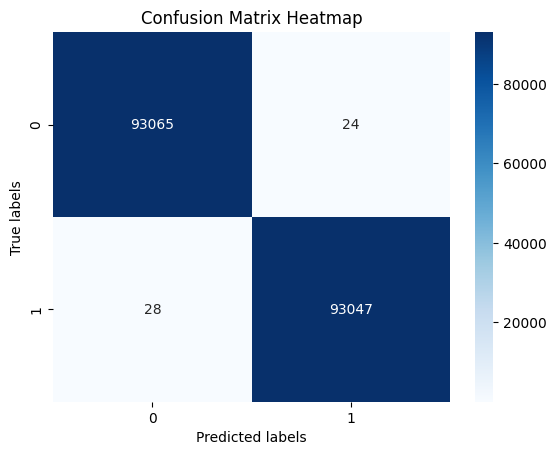

<Figure size 640x480 with 0 Axes>

In [33]:
# Crie um gráfico de calor para a matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
plt.savefig('confusionMatrix_HxCTrad_EncoderSVM.pdf')  # Salva a figura no formato PDF

## Decision Tree Traditional and Ordinal Patters Characteristics

### Model

Matriz de Confusão:
[[93089     0]
 [    0 93075]]
Acurácia: 1.0000
Pontuação F1: 1.0000
Tempo de Treinamento (segundos): 0.39
Melhor modelo de árvore de decisão salvo.


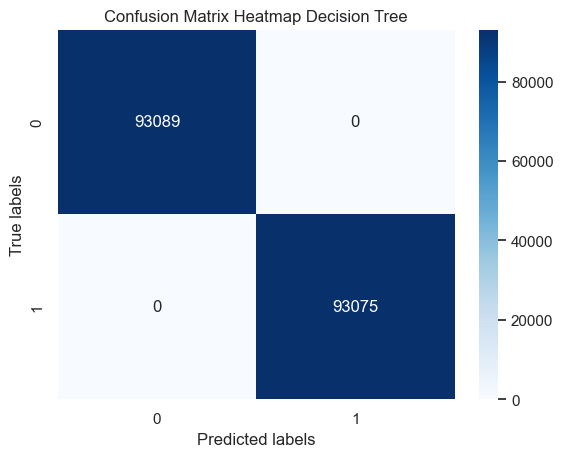

<Figure size 640x480 with 0 Axes>

In [220]:
# # Inicialização das variáveis
# best_accuracy = 0
# best_f1_score = 0
# best_model = None
# best_params = None
# best_time = float('inf')

# # Caminhos de salvamento do modelo
# model_save_path = "best_model_decision_tree_HxCTrad.pkl"

# # Inicie o cronômetro
# start_time = time.time()

# # Crie e treine o modelo de árvore de decisão
# decision_tree_model = DecisionTreeClassifier()
# decision_tree_model.fit(X_train_normalized, y_train)

# # Pare o cronômetro
# end_time = time.time()
# training_time = end_time - start_time

# # Faça previsões no conjunto de teste
# y_pred = decision_tree_model.predict(X_test_normalized)

# # Avalie o modelo
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Exiba a matriz de confusão, acurácia e pontuação F1
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Matriz de Confusão:")
# print(conf_matrix)
# print(f"Acurácia: {accuracy:.4f}")
# print(f"Pontuação F1: {f1:.4f}")
# print(f"Tempo de Treinamento (segundos): {training_time:.2f}")

# # Atualize o melhor modelo com base na acurácia e pontuação F1
# if accuracy > best_accuracy or f1 > best_f1_score:
#     best_accuracy = accuracy
#     best_f1_score = f1
#     best_model = decision_tree_model
#     best_time = training_time
#     # Salve o melhor modelo
#     joblib.dump(best_model, model_save_path)
#     print("Melhor modelo de árvore de decisão salvo.")


# # Crie um gráfico de calor para a matriz de confusão
# sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix Heatmap Decision Tree')
# plt.show()
# plt.savefig('confusionMatrix_HxCTrad_DecisionT.pdf')  # Salva a figura no formato PDF

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=1.000 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=1.000 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=1.000 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=1.000 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=1.000 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=1.000 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=1.000 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=1.000 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=1.000 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=None, min_samples

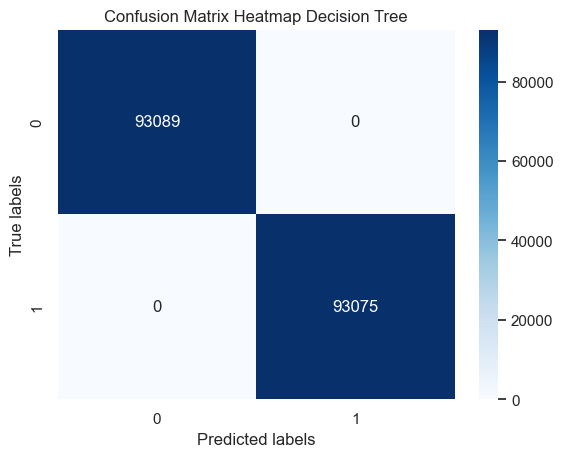

<Figure size 640x480 with 0 Axes>

In [223]:
# Configuração do GridSearchCV para Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}

# Inicialização do GridSearchCV com o modelo de árvore de decisão
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinamento do modelo de árvore de decisão com GridSearchCV para encontrar os melhores hiperparâmetros
start_time = time.time()
decision_tree_grid_search.fit(X_train_normalized, y_train)
training_time = time.time() - start_time

# Avaliação do melhor modelo de árvore de decisão encontrado pelo GridSearchCV
best_decision_tree_model = decision_tree_grid_search.best_estimator_
y_pred = best_decision_tree_model.predict(X_test_normalized)

# Calcula as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calcula a matriz de confusão e depois cria o heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe as melhores configurações e métricas
print('Best Parameters:', decision_tree_grid_search.best_params_)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f"Training Time Decision Tree: {training_time:.2f} seconds")

# Salve o melhor modelo de árvore de decisão
model_save_path = "best_model_decision_tree_HxCOrd.pkl"
joblib.dump(best_decision_tree_model, model_save_path)

# Crie um gráfico de calor para a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap Decision Tree')
plt.show()
plt.savefig('confusionMatrix_model_Decision_Tree_HxCOrd.pdf')  # Salva a figura no formato PDF

In [ ]:
variables_to_save_DecisionTree_HxCOrd = {
    'accuracy': accuracy,
    'recall': recall,
    'precision': precision,
    'f1_score': f1,
    'confusion_matrix': confusion_matrix_result,
    'best_params': best_svm_params,
}

# Caminho do arquivo onde as variáveis serão salvas
variables_save_path = 'variables_to_save_DecisionTree_HxCOrd.pkl'

# Salvando as variáveis para uso posterior
with open(variables_save_path, 'wb') as file:
    pickle.dump(variables_to_save_DecisionTree_HxCOrd, file)
print("Variáveis salvas com sucesso.")


# # Carregando as variáveis salvas anteriormente
# with open(variables_to_save_DecisionTree_HxCOrd, 'rb') as file:
#     loaded_variables = pickle.load(file)
# print("Variáveis carregadas com sucesso.")

# # Acessando variáveis carregadas
# accuracy_loaded = loaded_variables['accuracy']
# recall_loaded = loaded_variables['recall']
# precision_loaded = loaded_variables['precision']
# f1_score_loaded = loaded_variables['f1_score']
# confusion_matrix_loaded = loaded_variables['confusion_matrix']
# best_params_loaded = loaded_variables['best_params']

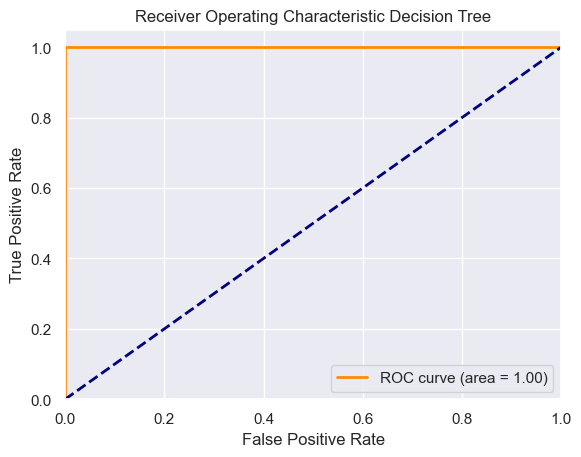

In [224]:
# `y_test` são os rótulos verdadeiros e `decision_tree_model` é o modelo já treinado
y_probs = best_decision_tree_model.predict_proba(X_test_normalized)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Decision Tree')
plt.legend(loc="lower right")
plt.savefig('roc_curve_HxCTrad_DecisionT.pdf')  # Salva a figura no formato PDF
# plt.close()

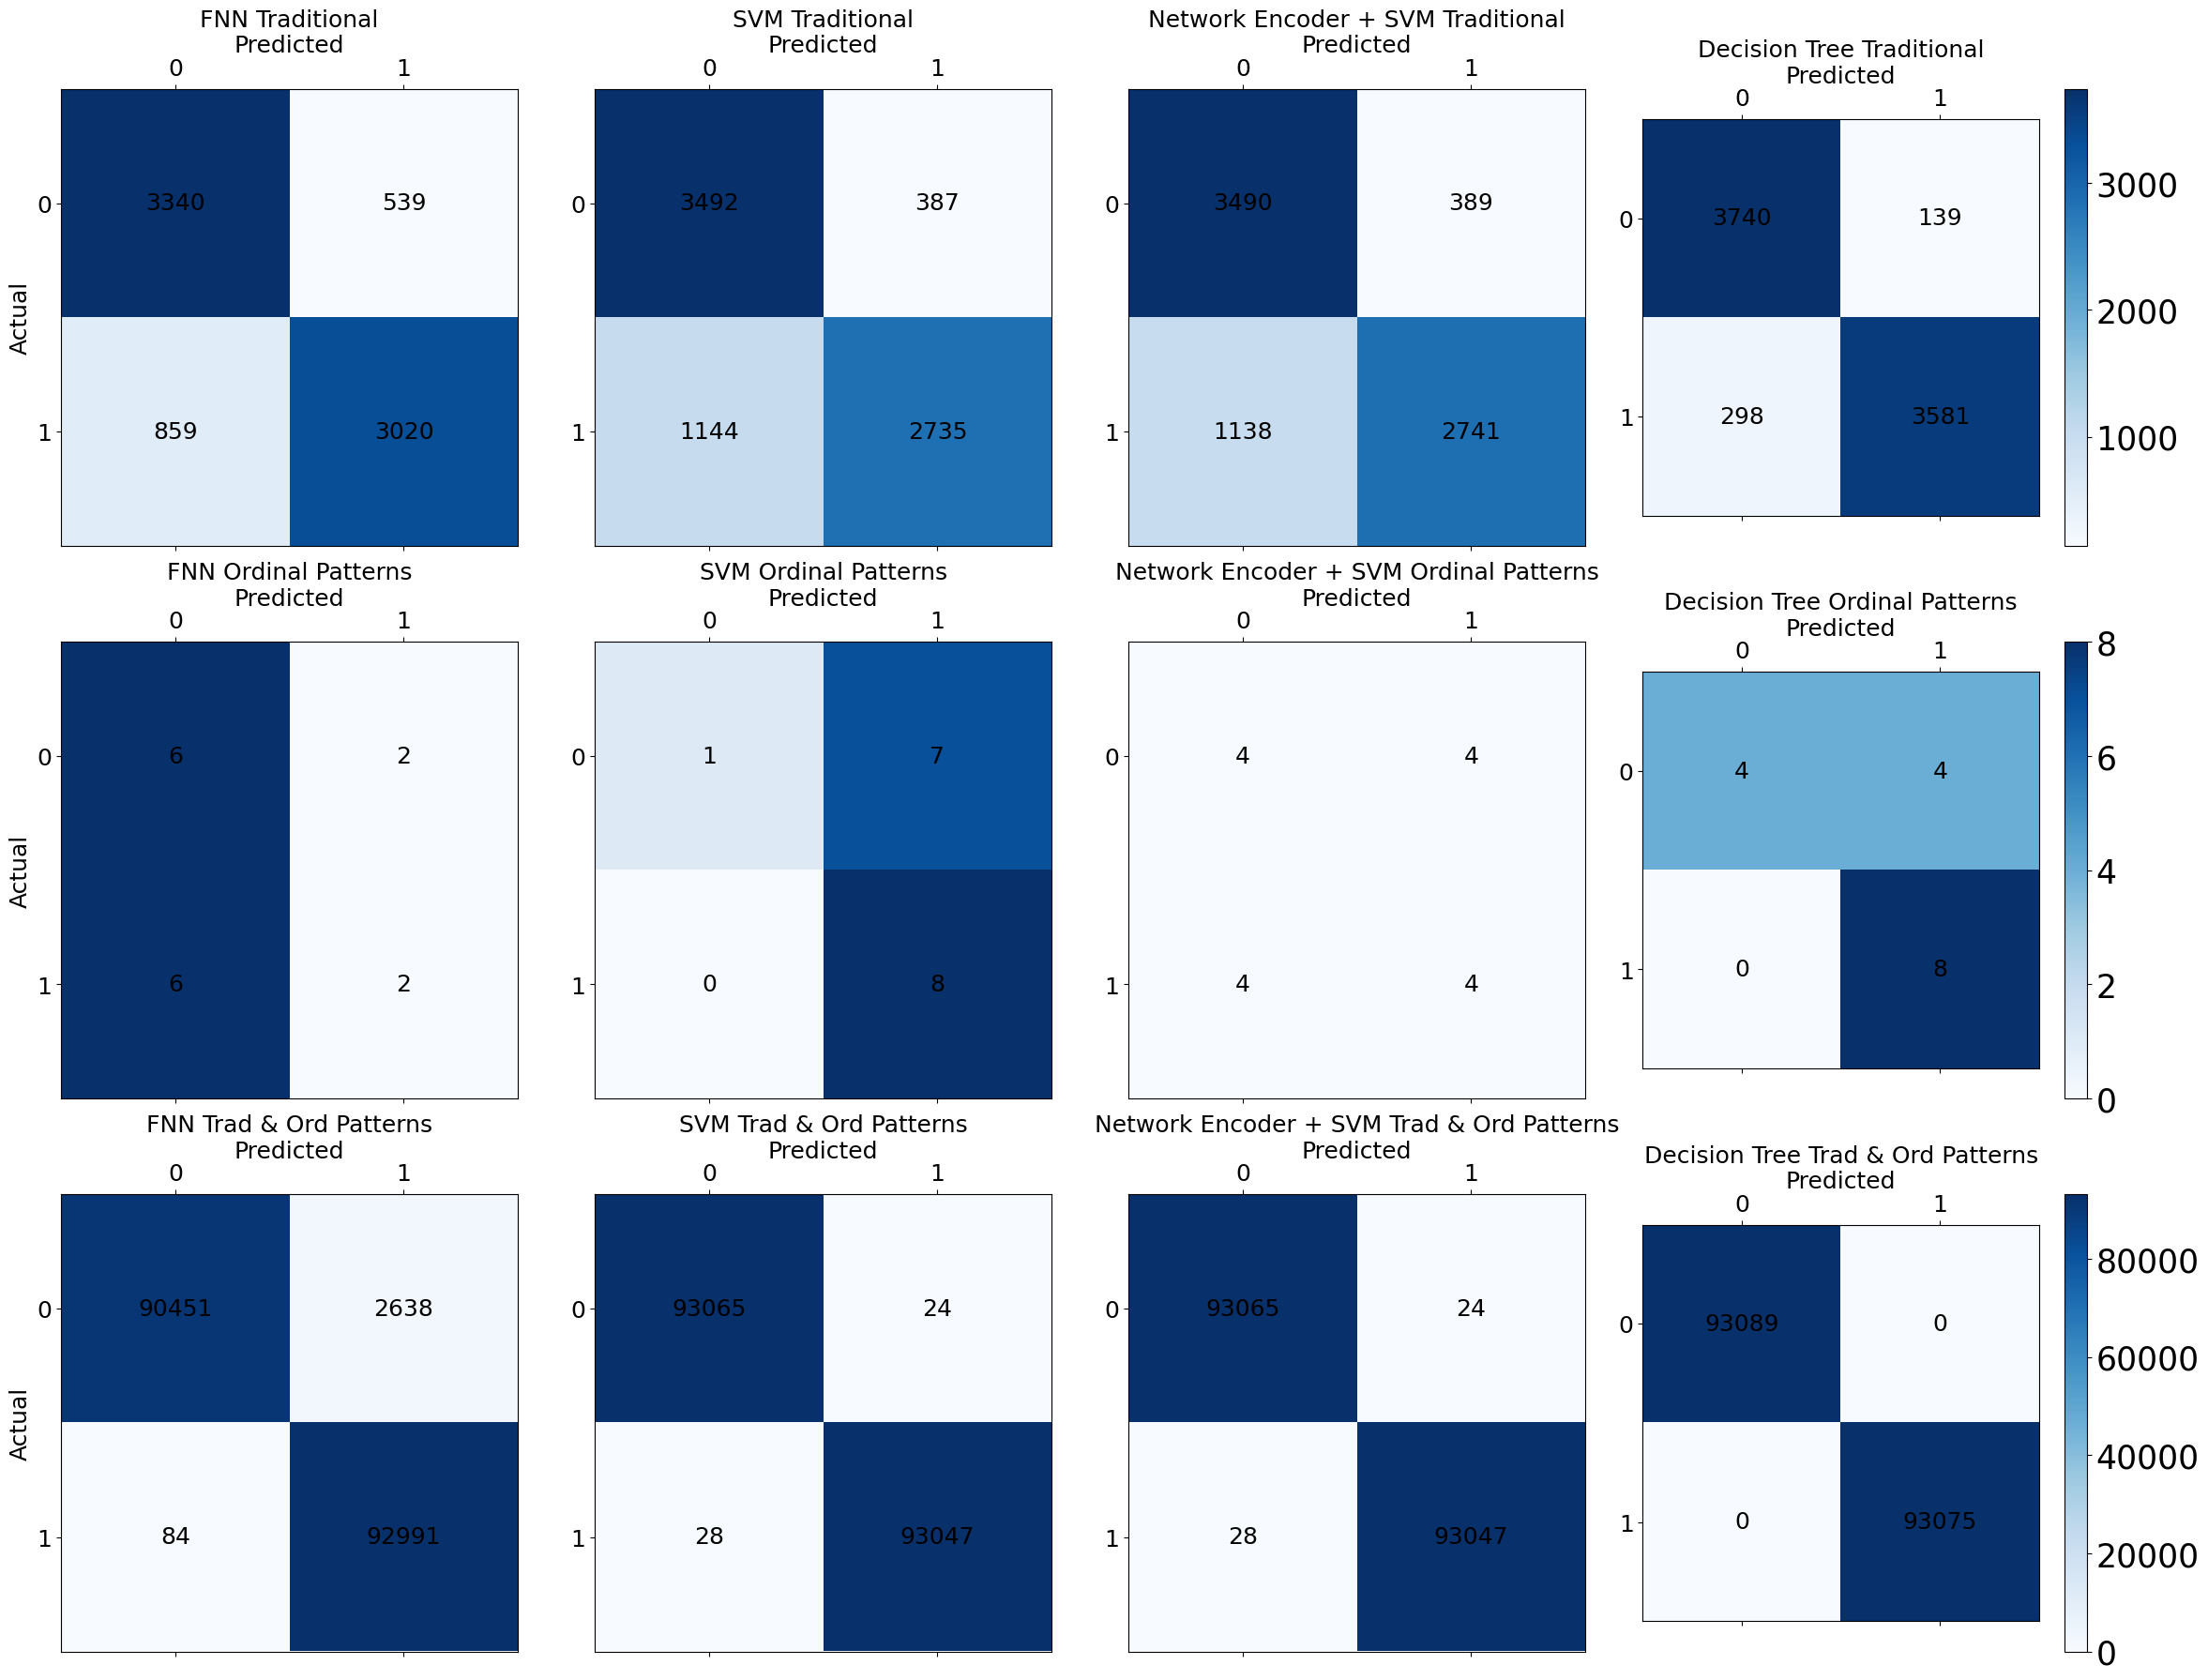

In [79]:
import matplotlib.pyplot as plt
import numpy as np

### Scenario I, II and III - Confusion Matrices for HVAC 

# Define a função para determinar a cor com base no valor
def get_text_color(value):
    if value > np.max(confusion_matrix):
        return 'white'  # Usar preto para valores em fundo claro
    else:
        return 'black'  # Usar branco para valores em fundo escuro

# Define as matrizes de confusão
confusion_matrices = {
    'FNN Traditional': np.array([[3340, 539], [859, 3020]]),
    'SVM Traditional': np.array([[3492, 387], [1144, 2735]]),
    'Network Encoder + SVM Traditional': np.array([[3490, 389], [1138, 2741]]),
    'Decision Tree Traditional': np.array([[3740, 139], [298, 3581]]),
    'FNN Ordinal Patterns': np.array([[6, 2], [6, 2]]),
    'SVM Ordinal Patterns': np.array([[1, 7], [0, 8]]),
    'Network Encoder + SVM Ordinal Patterns': np.array([[4, 4], [4, 4]]),
    'Decision Tree Ordinal Patterns': np.array([[4, 4], [0, 8]]),
    'FNN Trad & Ord Patterns': np.array([[90451, 2638], [84, 92991]]),
    'SVM Trad & Ord Patterns': np.array([[93065, 24], [28, 93047]]),
    'Network Encoder + SVM Trad & Ord Patterns': np.array([[93065, 24], [28, 93047]]),
    'Decision Tree Trad & Ord Patterns': np.array([[93089, 0], [0, 93075]])
}

# Plotar as matrizes de confusão
fig, axes = plt.subplots(3, 4, figsize=(24, 18))  # Ajustado para 3 linhas e 4 colunas
axes = axes.flatten()

for i, (model, confusion_matrix) in enumerate(confusion_matrices.items()):
    ax = axes[i]
    cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)

    # Adicionar barra de cores apenas no último gráfico de cada linha
    if (i + 1) % 4 == 0:
        colorbar = plt.colorbar(cax, ax=ax)
        colorbar.ax.tick_params(labelsize=18)

    ax.set_title(model, fontsize=18)
    ax.set_xlabel('Predicted', fontsize=18)

    # Apenas definir o rótulo 'Actual' para o primeiro gráfico de cada linha
    if i % 4 == 0:
        ax.set_ylabel('Actual', fontsize=18)
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='both', which='major', labelsize=18)

    # Anotar o mapa de calor com texto
    for (j, k), val in np.ndenumerate(confusion_matrix):
        text_color = get_text_color(val)
        ax.text(k, j, f"{val}", ha='center', va='center', color=text_color, fontsize=18)

# Ocultar subgráficos não utilizados
for i in range(len(confusion_matrices), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('MatrizAll.pdf')  # Salva a figura no formato PDF
plt.show()

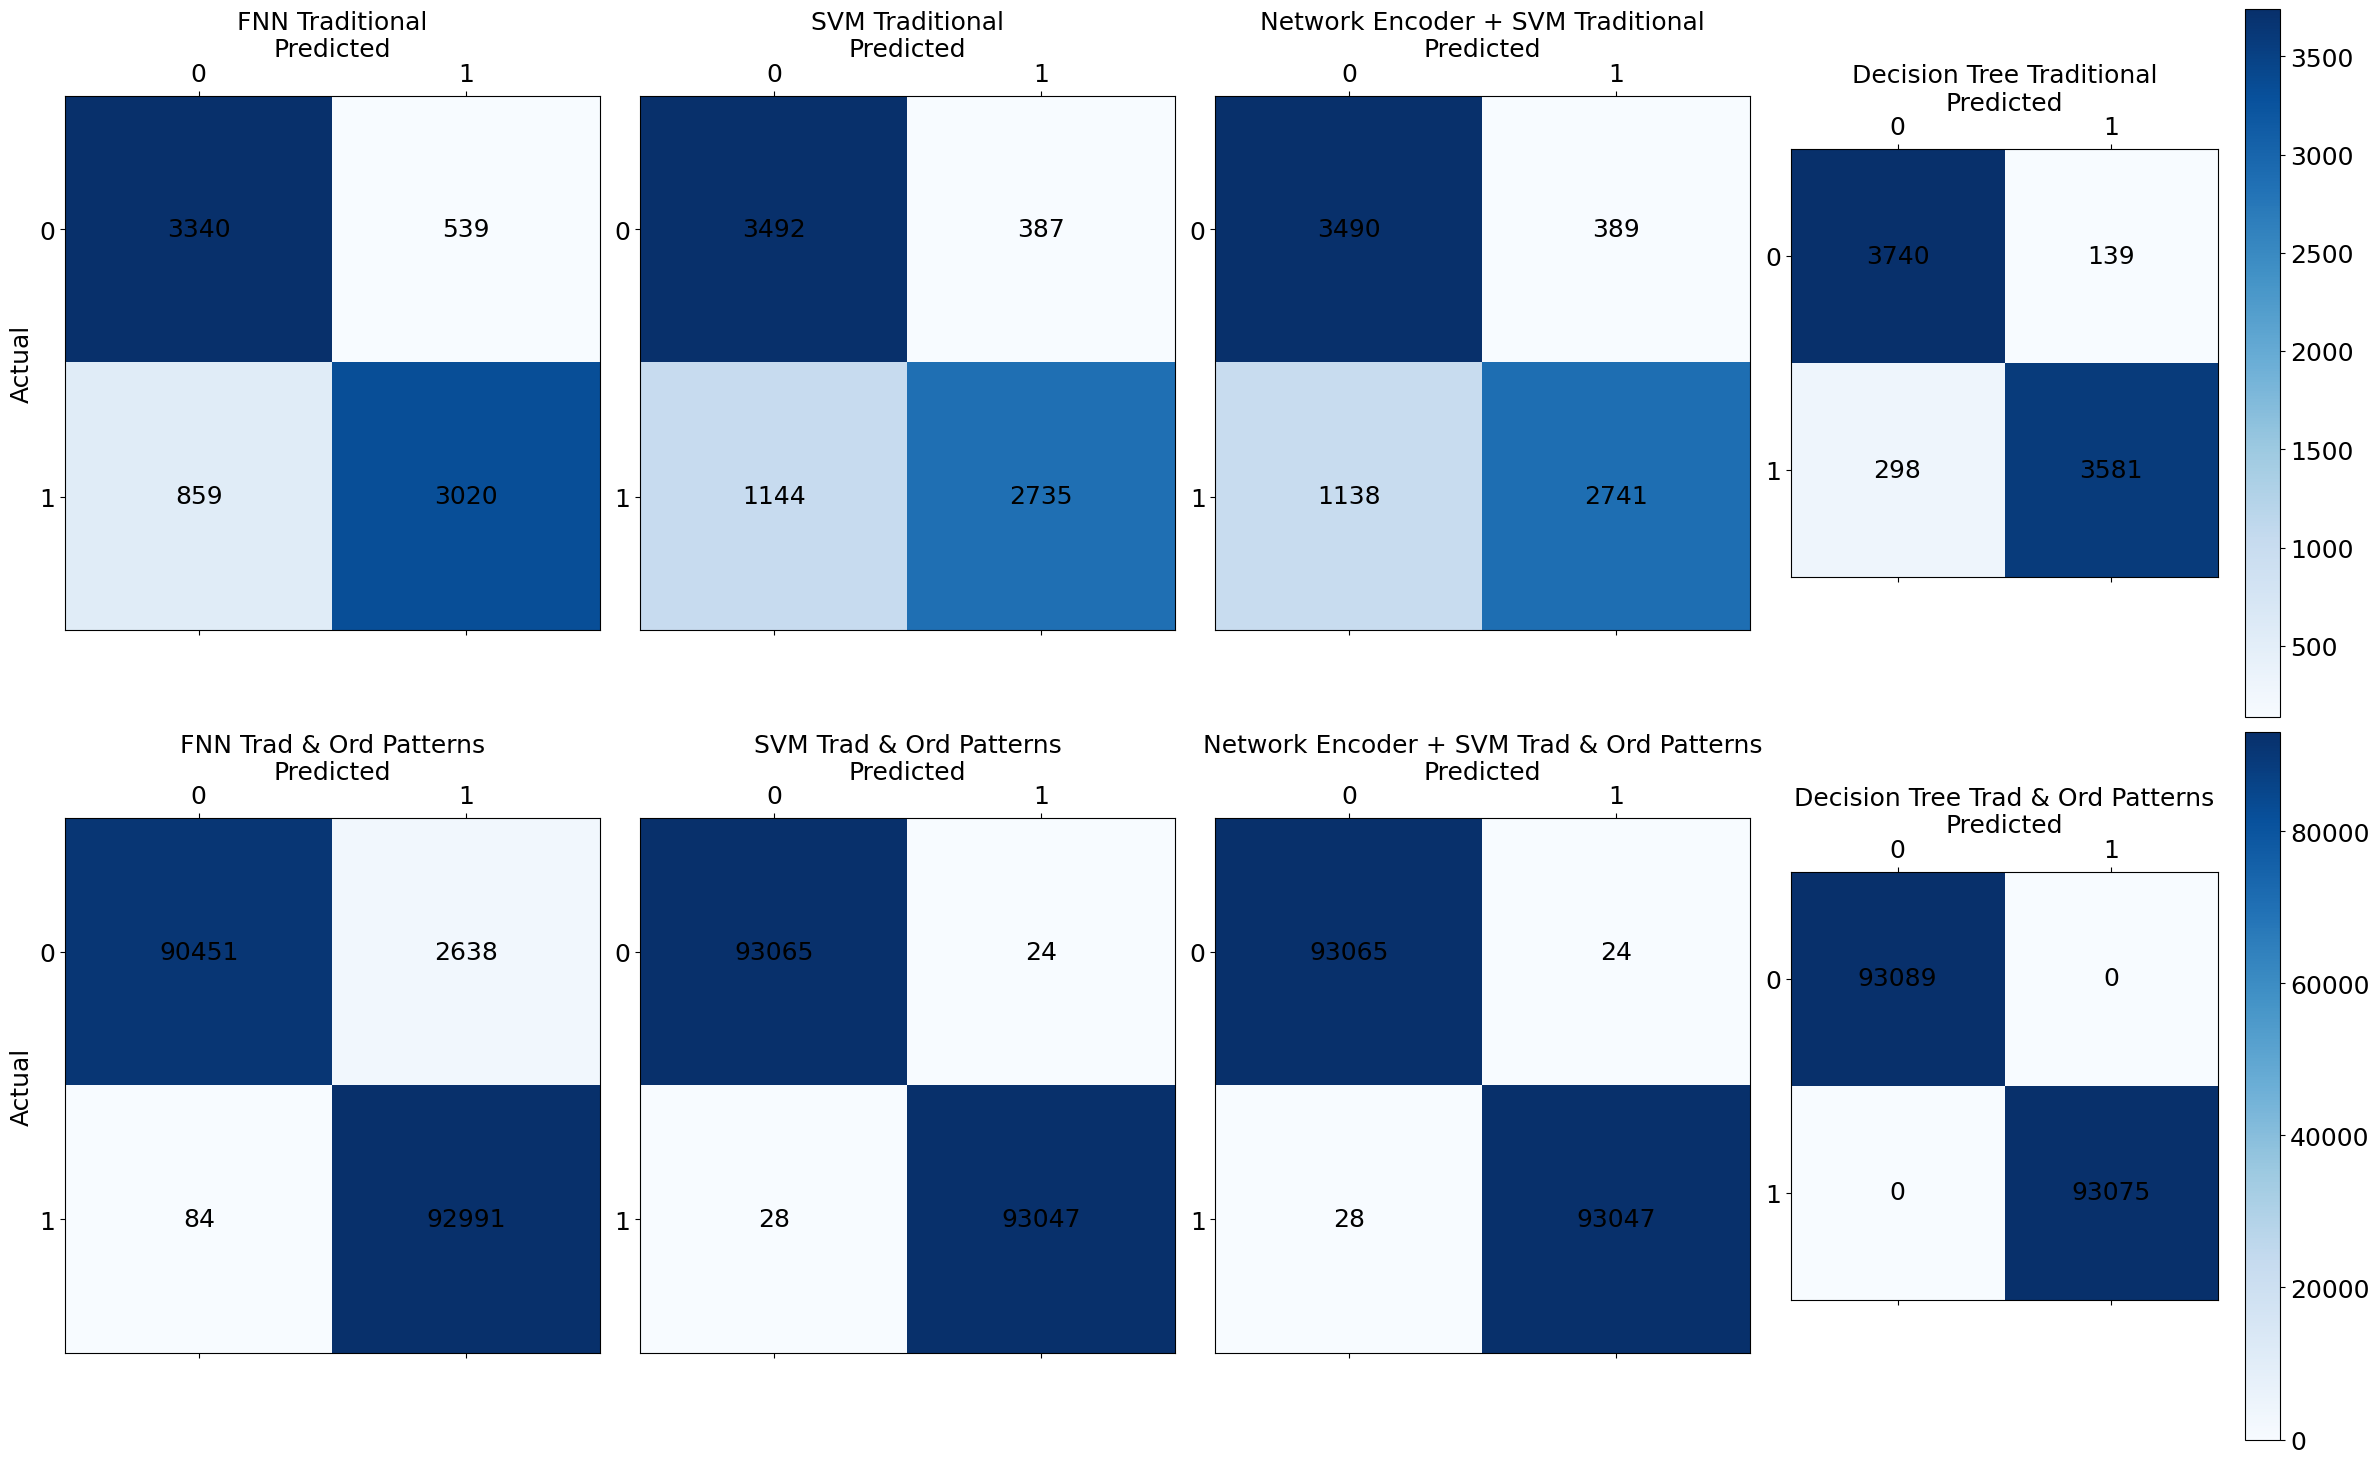

In [148]:
### Scenario I and II - Confusion Matrices for HVAC 

# Define a função para determinar a cor com base no valor
def get_text_color(value):
    if value > np.max(confusion_matrix):
        return 'white'  # Usar preto para valores em fundo claro
    else:
        return 'black'  # Usar branco para valores em fundo escuro

# Define as matrizes de confusão
confusion_matrices = {
    'FNN Traditional': np.array([[3340, 539], [859, 3020]]),
    'SVM Traditional': np.array([[3492, 387], [1144, 2735]]),
    'Network Encoder + SVM Traditional': np.array([[3490, 389], [1138, 2741]]),
    'Decision Tree Traditional': np.array([[3740, 139], [298, 3581]]),
    'FNN Trad & Ord Patterns': np.array([[90451, 2638], [84, 92991]]),
    'SVM Trad & Ord Patterns': np.array([[93065, 24], [28, 93047]]),
    'Network Encoder + SVM Trad & Ord Patterns': np.array([[93065, 24], [28, 93047]]),
    'Decision Tree Trad & Ord Patterns': np.array([[93089, 0], [0, 93075]])
}

# Plotar as matrizes de confusão
fig, axes = plt.subplots(2, 4, figsize=(24, 15))  # Ajustado para 3 linhas e 4 colunas
axes = axes.flatten()

for i, (model, confusion_matrix) in enumerate(confusion_matrices.items()):
    ax = axes[i]
    cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)

    # Adicionar barra de cores apenas no último gráfico de cada linha
    if (i + 1) % 4 == 0:
        colorbar = plt.colorbar(cax, ax=ax)
        colorbar.ax.tick_params(labelsize=18)

    ax.set_title(model, fontsize=18)
    ax.set_xlabel('Predicted', fontsize=18)

    # Apenas definir o rótulo 'Actual' para o primeiro gráfico de cada linha
    if i % 4 == 0:
        ax.set_ylabel('Actual', fontsize=18)
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='both', which='major', labelsize=18)

    # Anotar o mapa de calor com texto
    for (j, k), val in np.ndenumerate(confusion_matrix):
        text_color = get_text_color(val)
        ax.text(k, j, f"{val}", ha='center', va='center', color=text_color, fontsize=18)

# Ocultar subgráficos não utilizados
for i in range(len(confusion_matrices), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('MatrizAll2.pdf')  # Salva a figura no formato PDF
plt.show()

/var/folders/3v/5dxc2ttn41zg55b7dvw5v9q40000gn/T/ipykernel_97913/1780357066.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.07, 1, 0.95])  # Ajusta o layout para dar mais espaço aos subplots


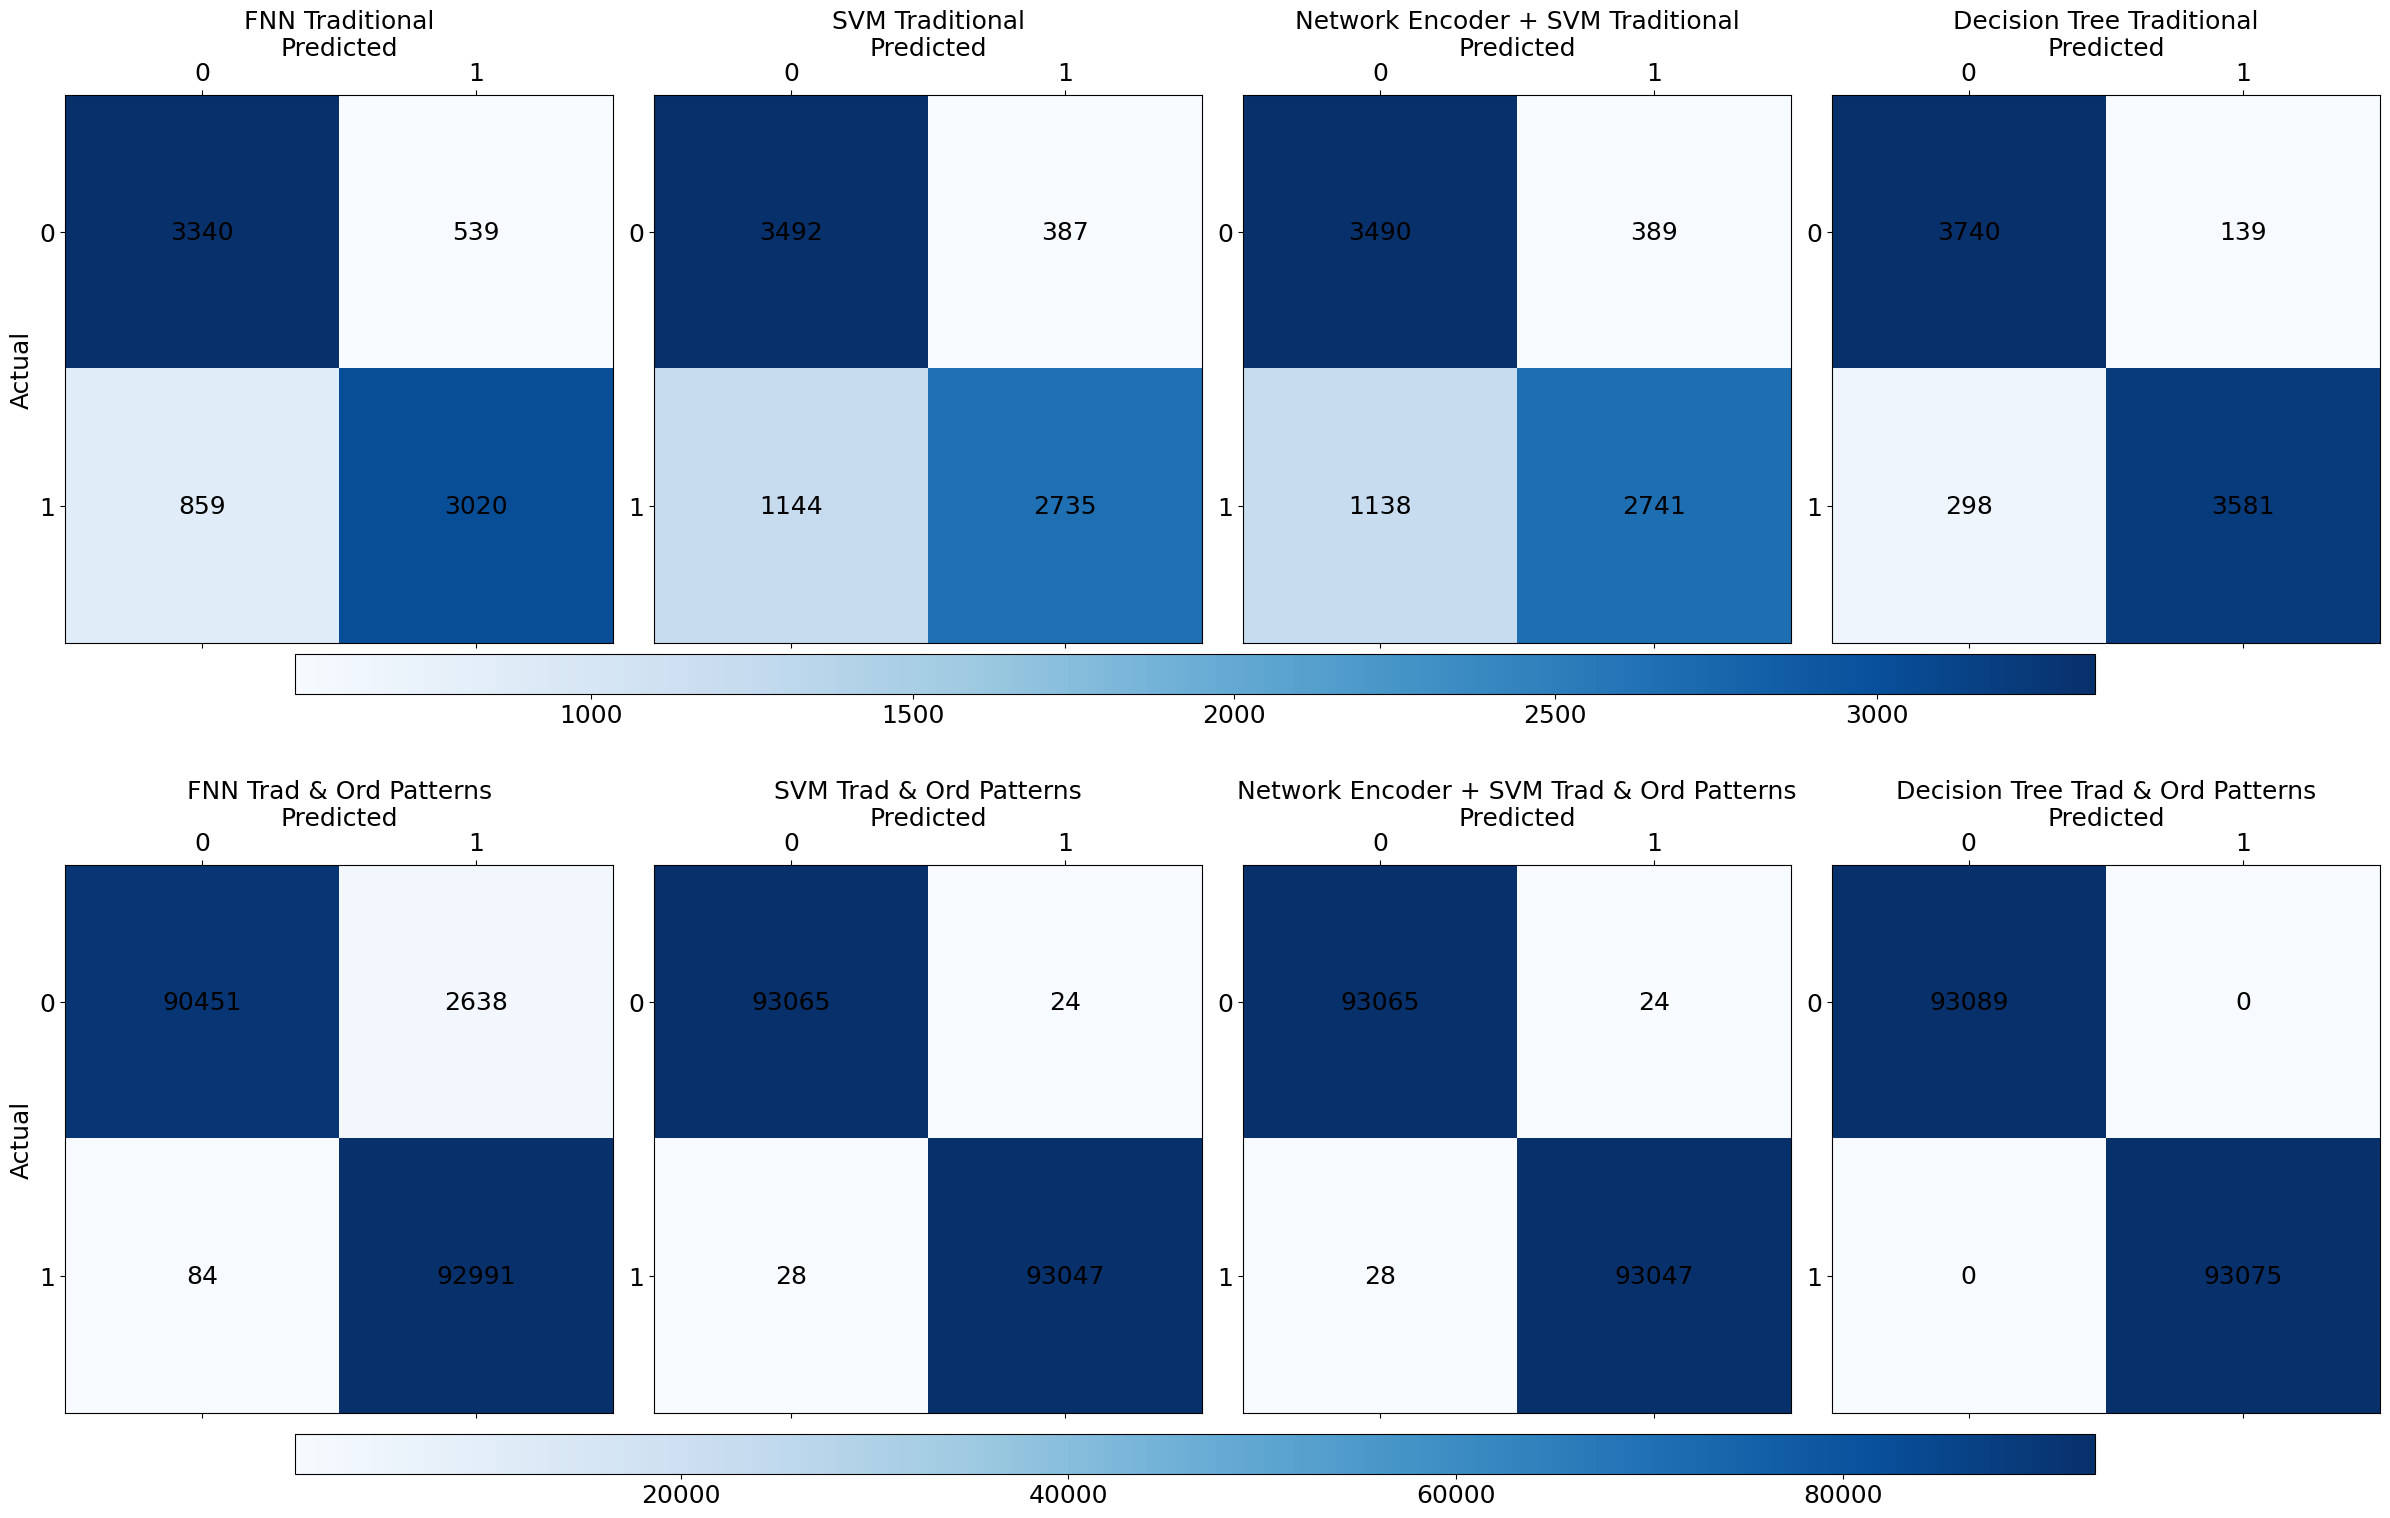

In [38]:
## NEW FIGURE

# Define a função para determinar a cor com base no valor
def get_text_color(value):
    if value > np.max(confusion_matrix):
        return 'white'  # Usar branco para valores em fundo escuro
    else:
        return 'black'  # Usar preto para valores em fundo claro

# Define as matrizes de confusão
confusion_matrices = {
    'FNN Traditional': np.array([[3340, 539], [859, 3020]]),
    'SVM Traditional': np.array([[3492, 387], [1144, 2735]]),
    'Network Encoder + SVM Traditional': np.array([[3490, 389], [1138, 2741]]),
    'Decision Tree Traditional': np.array([[3740, 139], [298, 3581]]),
    'FNN Trad & Ord Patterns': np.array([[90451, 2638], [84, 92991]]),
    'SVM Trad & Ord Patterns': np.array([[93065, 24], [28, 93047]]),
    'Network Encoder + SVM Trad & Ord Patterns': np.array([[93065, 24], [28, 93047]]),
    'Decision Tree Trad & Ord Patterns': np.array([[93089, 0], [0, 93075]])
}

fig, axes = plt.subplots(2, 4, figsize=(24, 20))  # Ajustado para 2 linhas e 4 colunas
axes = axes.flatten()

# Primeira linha de plots
for i in range(4):
    model = list(confusion_matrices.keys())[i]
    confusion_matrix = confusion_matrices[model]
    ax = axes[i]
    cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)

    ax.set_title(model, fontsize=18)
    ax.set_xlabel('Predicted', fontsize=18)

    if i == 0:
        ax.set_ylabel('Actual', fontsize=18)
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='both', which='major', labelsize=18)

    for (j, k), val in np.ndenumerate(confusion_matrix):
        text_color = get_text_color(val)
        ax.text(k, j, f"{val}", ha='center', va='center', color=text_color, fontsize=18)

# Barra de cores para a primeira linha
cbar_ax1 = fig.add_axes([0.125, 0.54, 0.75, 0.02])
plt.colorbar(axes[0].images[0], cax=cbar_ax1, orientation='horizontal').ax.tick_params(labelsize=18)

# Segunda linha de plots
for i in range(4, 8):
    model = list(confusion_matrices.keys())[i]
    confusion_matrix = confusion_matrices[model]
    ax = axes[i]
    cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)

    ax.set_title(model, fontsize=18)
    ax.set_xlabel('Predicted', fontsize=18)

    if i == 4:
        ax.set_ylabel('Actual', fontsize=18)
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='both', which='major', labelsize=18)

    for (j, k), val in np.ndenumerate(confusion_matrix):
        text_color = get_text_color(val)
        ax.text(k, j, f"{val}", ha='center', va='center', color=text_color, fontsize=18)

# Barra de cores para a segunda linha
cbar_ax2 = fig.add_axes([0.125, 0.15, 0.75, 0.02])
plt.colorbar(axes[4].images[0], cax=cbar_ax2, orientation='horizontal').ax.tick_params(labelsize=18)

plt.tight_layout(rect=[0, 0.07, 1, 0.95])  # Ajusta o layout para dar mais espaço aos subplots
plt.savefig('MatrizAllNewAdjusted.pdf')  # Salva a figura no formato PDF
plt.show()



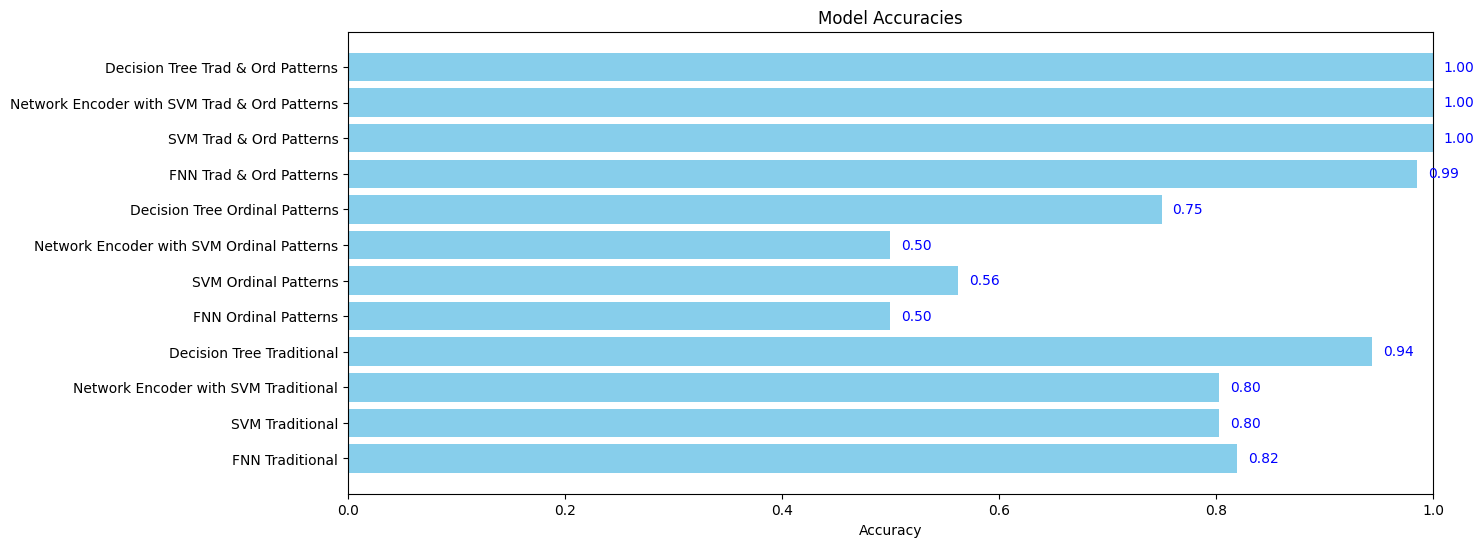

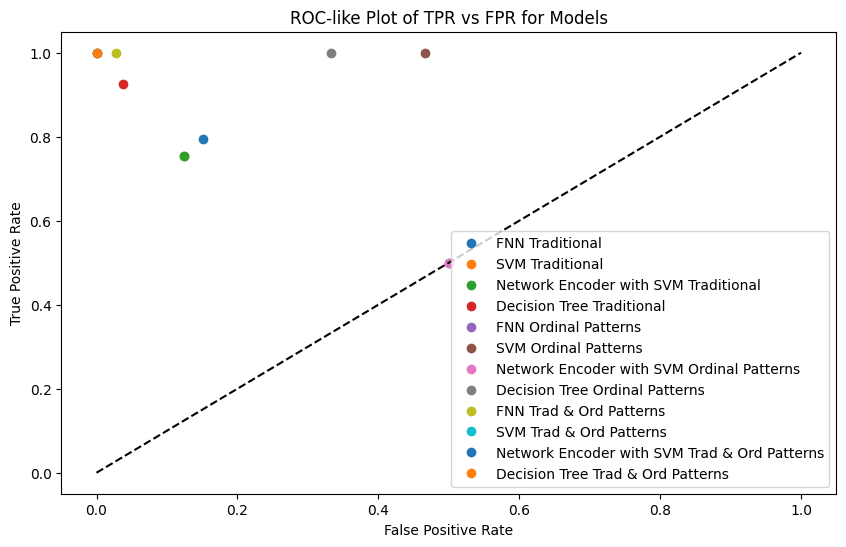

<Figure size 1000x600 with 0 Axes>

In [20]:

### Scenario I, II and III - ROC

# Data
models = ["FNN Traditional", "SVM Traditional", "Network Encoder with SVM Traditional", 
          "Decision Tree Traditional", "FNN Ordinal Patterns", "SVM Ordinal Patterns", 
          "Network Encoder with SVM Ordinal Patterns", "Decision Tree Ordinal Patterns", 
          "FNN Trad & Ord Patterns", "SVM Trad & Ord Patterns", 
          "Network Encoder with SVM Trad & Ord Patterns", "Decision Tree Trad & Ord Patterns"]

accuracies = [ (3340 + 3020) / (3340 + 539 + 859 + 3020), 
               (3492 + 2735) / (3492 + 387 + 1144 + 2735), 
               (3490 + 2741) / (3490 + 389 + 1138 + 2741), 
               (3740 + 3581) / (3740 + 139 + 298 + 3581), 
               (6 + 2) / (6 + 2 + 6 + 2), 
               (1 + 8) / (1 + 7 + 0 + 8), 
               (4 + 4) / (4 + 4 + 4 + 4), 
               (4 + 8) / (4 + 4 + 0 + 8), 
               (90451 + 92991) / (90451 + 2638 + 84 + 92991), 
               (93065 + 93047) / (93065 + 24 + 28 + 93047), 
               (93065 + 93047) / (93065 + 24 + 28 + 93047), 
               (93089 + 93075) / (93089 + 0 + 0 + 93075) ]

# Bar Chart for Accuracies
plt.figure(figsize=(14, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f"{v:.2f}", color='blue', va='center')

# ROC-like Curves (TPR vs FPR)
tpr = [3340 / (3340 + 859), 3492 / (3492 + 1144), 3490 / (3490 + 1138), 
       3740 / (3740 + 298), 6 / (6 + 6), 1 / (1 + 0), 4 / (4 + 4), 
       4 / (4 + 0), 90451 / (90451 + 84), 93065 / (93065 + 28), 
       93065 / (93065 + 28), 93089 / (93089 + 0)]

fpr = [539 / (539 + 3020), 387 / (387 + 2735), 389 / (389 + 2741), 
       139 / (139 + 3581), 2 / (2 + 2), 7 / (7 + 8), 4 / (4 + 4), 
       4 / (4 + 8), 2638 / (2638 + 92991), 24 / (24 + 93047), 
       24 / (24 + 93047), 0 / (0 + 93075)]

plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(fpr[i], tpr[i], 'o', label=models[i])
plt.plot([0, 1], [0, 1], 'k--') # random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-like Plot of TPR vs FPR for Models')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision = [3340 / (3340 + 539), 3492 / (3492 + 387), 3490 / (3490 + 389), 
             3740 / (3740 + 139), 6 / (6 + 2), 1 / (1 + 7), 4 / (4 + 4), 
             4 / (4 + 4), 90451 / (90451 + 2638), 93065 / (93065 + 24), 
             93065 / (93065 + 24), 93089 / (93089 + 0)]

recall = tpr  # same as TPR

plt.figure(figsize=(10, 6))



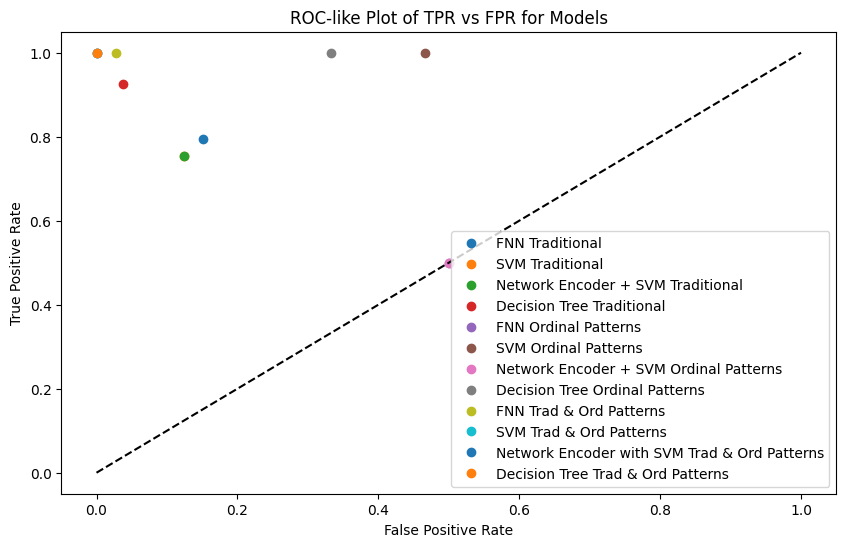

In [21]:
### Scenario I, II and III - ROC

# Data for ROC-like plot
models = ["FNN Traditional", "SVM Traditional", "Network Encoder + SVM Traditional", 
          "Decision Tree Traditional", "FNN Ordinal Patterns", "SVM Ordinal Patterns", 
          "Network Encoder + SVM Ordinal Patterns", "Decision Tree Ordinal Patterns", 
          "FNN Trad & Ord Patterns", "SVM Trad & Ord Patterns", 
          "Network Encoder with SVM Trad & Ord Patterns", "Decision Tree Trad & Ord Patterns"]

# True Positive Rate and False Positive Rate
tpr = [3340 / (3340 + 859), 3492 / (3492 + 1144), 3490 / (3490 + 1138), 
       3740 / (3740 + 298), 6 / (6 + 6), 1 / (1 + 0), 4 / (4 + 4), 
       4 / (4 + 0), 90451 / (90451 + 84), 93065 / (93065 + 28), 
       93065 / (93065 + 28), 93089 / (93089 + 0)]

fpr = [539 / (539 + 3020), 387 / (387 + 2735), 389 / (389 + 2741), 
       139 / (139 + 3581), 2 / (2 + 2), 7 / (7 + 8), 4 / (4 + 4), 
       4 / (4 + 8), 2638 / (2638 + 92991), 24 / (24 + 93047), 
       24 / (24 + 93047), 0 / (0 + 93075)]

# Plotting ROC-like Curve
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(fpr[i], tpr[i], 'o', label=models[i])
plt.plot([0, 1], [0, 1], 'k--') # random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-like Plot of TPR vs FPR for Models')
plt.legend(loc="lower right")
plt.savefig('ROCAll.pdf')  # Salva a figura no formato PDF
plt.show()


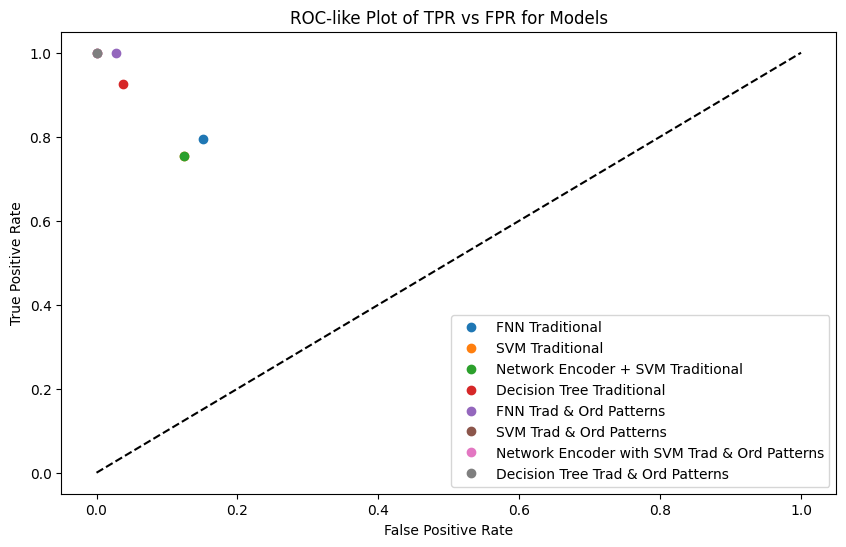

In [223]:
### Scenario I and II - ROC

# Data for ROC-like plot
models = ["FNN Traditional", "SVM Traditional", "Network Encoder + SVM Traditional", 
          "Decision Tree Traditional", "FNN Trad & Ord Patterns", "SVM Trad & Ord Patterns", 
          "Network Encoder with SVM Trad & Ord Patterns", "Decision Tree Trad & Ord Patterns"]

# True Positive Rate and False Positive Rate
tpr = [3340 / (3340 + 859), 3492 / (3492 + 1144), 3490 / (3490 + 1138), 
       3740 / (3740 + 298), 90451 / (90451 + 84), 93065 / (93065 + 28), 
       93065 / (93065 + 28), 93089 / (93089 + 0)]

fpr = [539 / (539 + 3020), 387 / (387 + 2735), 389 / (389 + 2741), 
       139 / (139 + 3581), 2638 / (2638 + 92991), 24 / (24 + 93047), 
       24 / (24 + 93047), 0 / (0 + 93075)]

# Plotting ROC-like Curve
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(fpr[i], tpr[i], 'o', label=models[i])
plt.plot([0, 1], [0, 1], 'k--') # random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-like Plot of TPR vs FPR for Models')
plt.legend(loc="lower right")
plt.savefig('ROCAll2.pdf')  # Salva a figura no formato PDF
plt.show()

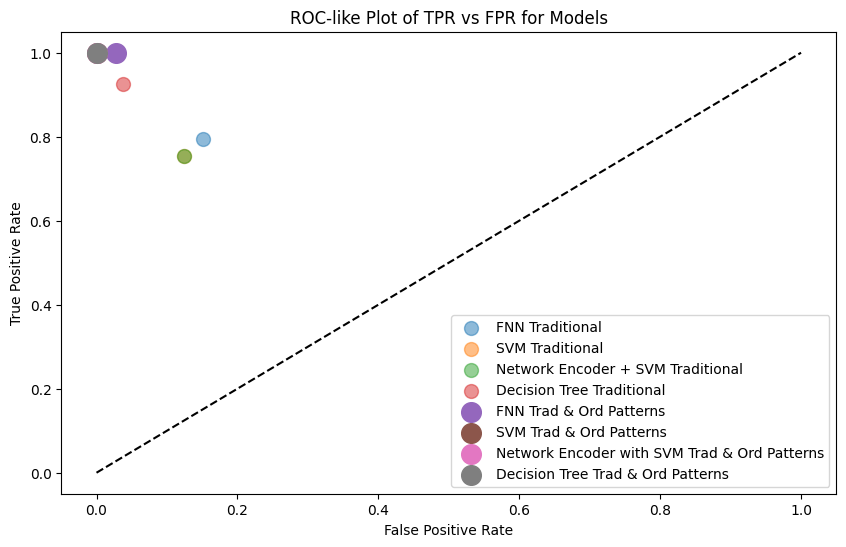

In [226]:
# Data for ROC-like plot
models = ["FNN Traditional", "SVM Traditional", "Network Encoder + SVM Traditional", 
          "Decision Tree Traditional", "FNN Trad & Ord Patterns", "SVM Trad & Ord Patterns", 
          "Network Encoder with SVM Trad & Ord Patterns", "Decision Tree Trad & Ord Patterns"]

# True Positive Rate and False Positive Rate
tpr = [3340 / (3340 + 859), 3492 / (3492 + 1144), 3490 / (3490 + 1138), 
       3740 / (3740 + 298), 90451 / (90451 + 84), 93065 / (93065 + 28), 
       93065 / (93065 + 28), 93089 / (93089 + 0)]

fpr = [539 / (539 + 3020), 387 / (387 + 2735), 389 / (389 + 2741), 
       139 / (139 + 3581), 2638 / (2638 + 92991), 24 / (24 + 93047), 
       24 / (24 + 93047), 0 / (0 + 93075)]

# Adjusting the size and transparency of points
sizes = [100, 100, 100, 100, 200, 200, 200, 200]
alpha_values = [0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0]

# Plotting ROC-like Curve
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.scatter(fpr[i], tpr[i], s=sizes[i], alpha=alpha_values[i], label=models[i])

plt.plot([0, 1], [0, 1], 'k--')  # random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-like Plot of TPR vs FPR for Models')
plt.legend(loc="lower right")
plt.savefig('ROCAll2_adjusted.pdf')  # Salva a figura no formato PDF
plt.show()


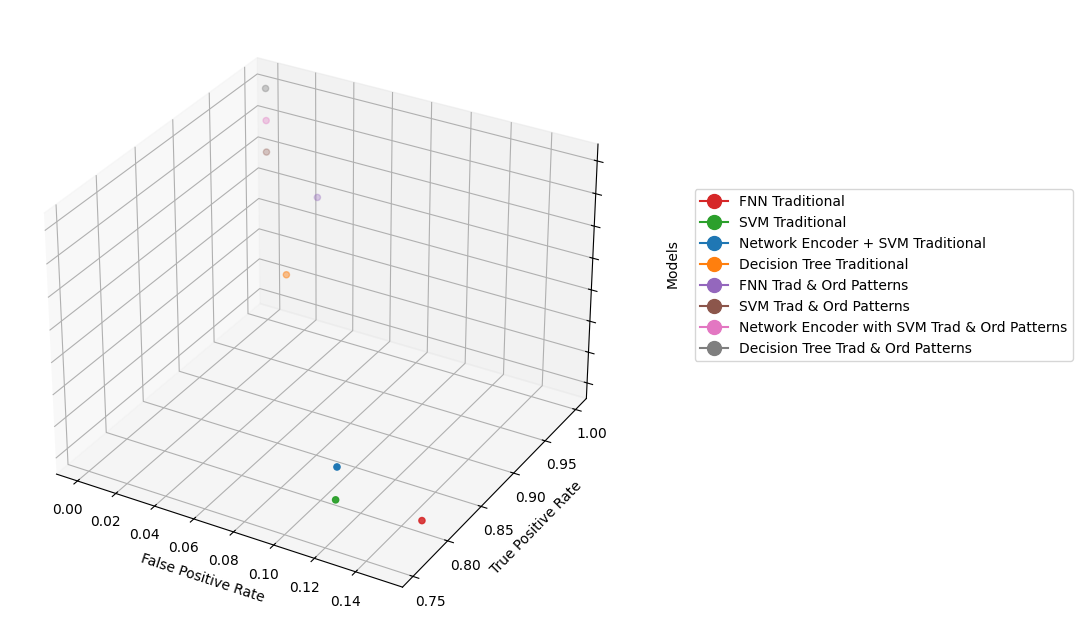

In [221]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Data for ROC-like plot
models = ["FNN Traditional", "SVM Traditional", "Network Encoder + SVM Traditional", 
          "Decision Tree Traditional", "FNN Trad & Ord Patterns", "SVM Trad & Ord Patterns", 
          "Network Encoder with SVM Trad & Ord Patterns", "Decision Tree Trad & Ord Patterns"]

# True Positive Rate, False Positive Rate, and models
tpr = [3340 / (3340 + 859), 3492 / (3492 + 1144), 3490 / (3490 + 1138), 
       3740 / (3740 + 298), 90451 / (90451 + 84), 93065 / (93065 + 28), 
       93065 / (93065 + 28), 93089 / (93089 + 0)]

fpr = [539 / (539 + 3020), 387 / (387 + 2735), 389 / (389 + 2741), 
       139 / (139 + 3581), 2638 / (2638 + 92991), 24 / (24 + 93047), 
       24 / (24 + 93047), 0 / (0 + 93075)]

# Color mapping
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Plotting 3D Curve
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color
scatter = ax.scatter(fpr, tpr, range(len(models)), c=colors, marker='o')

# Adicionando labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Adicionando ticks e labels no eixo Z
ax.set_zticks(range(len(models)))
ax.set_zticklabels([])  # Removendo ticks do eixo Z

# Adicionando título ao eixo Z
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Models', rotation=90, labelpad=15)

# Criando uma legenda com cores personalizadas
legend_elements = [Line2D([0], [0], marker='o', color=colors[i], label=models[i], markerfacecolor=colors[i], markersize=10) for i in range(len(models))]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.1, 0.72))

# Adicionando grade
ax.grid(True)

# # Ajustando a escala dos eixos
# plt.xlim([-0.1, 1.1])
# plt.ylim([-0.1, 1.1])

# Title
# ax.set_title('3D Plot of TPR, FPR, and Models')

plt.show()



 The visualized confusion matrices for the machine learning models applied in three different scenarios. The matrices provide a clear depiction of each model's performance, illustrating true positives, false positives, false negatives, and true negatives. The results indicate varying levels of accuracy and precision, with certain models like the Decision Tree in the traditional and ordinal patterns scenario demonstrating optimal performance with a perfect score across all metrics. This graphical representation can serve as a basis for in-depth analysis and further enhancement of predictive maintenance strategies.

# CONCLUSION

## Network Encoder with SVM

A Network Encoder with SVM is a composite model that marries the feature learning capabilities of a neural network with the classification strength of a Support Vector Machine. Initially, the network encoder, typically a type of neural network like an autoencoder, learns to transform raw input data into a set of encoded features that represent the data in a new, potentially more informative way. These encoded features are then fed into an SVM, a powerful algorithm known for its effectiveness in classification tasks, especially for data that is not linearly separable. The SVM uses these features to classify the input data into different categories. This hybrid approach aims to leverage the strengths of both components: the neural network's ability to extract complex patterns and the SVM's robust decision-making capabilities.

## Summary of Results

### Traditional Models

#### FNN Traditional
**Confusion Matrix:**
- 3340 - 539
- 859 - 3020

#### SVM Traditional
**Confusion Matrix:**
- 3492 - 387
- 1144 - 2735

#### Network Encoder with SVM Traditional
**Confusion Matrix:**
- 3490 - 389
- 1138 - 2741

#### Decision Tree Traditional
**Confusion Matrix:**
- 3740 - 139
- 298 - 3581

### Ordinal Patterns

#### FNN Ordinal Patterns
**Confusion Matrix:**
- 6 - 2
- 6 - 2

#### SVM Ordinal Patterns
**Confusion Matrix:**
- 1 - 7
- 0 - 8

#### Network Encoder with SVM Ordinal Patterns
**Confusion Matrix:**
- 4 - 4
- 4 - 4

#### Decision Tree Ordinal Patterns
**Confusion Matrix:**
- 4 - 4
- 0 - 8

### Traditional and Ordinal Patterns Characteristics

#### FNN with Traditional and Ordinal Patterns Characteristics
**Confusion Matrix:**
- 90451 - 2638
- 84 - 92991

#### SVM with Traditional and Ordinal Patterns Characteristics
**Confusion Matrix:**
- 93065 - 24
- 28 - 93047

#### Network Encoder with SVM with Traditional and Ordinal Patterns Characteristics
**Confusion Matrix:**
- 93065 - 24
- 28 - 93047

#### Decision Tree with Traditional and Ordinal Patterns Characteristics
**Confusion Matrix:**
- 93089 - 0
- 0 - 93075
